# WeRateDogs - Wrangle and Analyze Data


## Table of Contents
- [Introduction](#intro)
<br><br>
- [Import libaries](#import)
<br><br>
- [Gather data](#gather)
    1. [File on Hand](#gather_1)
    2. [File from Internet](#gather_2)
    3. [API data](#gather_3)
<br><br>
- [Assess Data](#assess)
    1. [File on Hand: df_twitter_archive](#assess_1)
    2. [File from Internet: df_images](#assess_2)
    3. [API data: df_tweets](#assess_3)
    4. [Quality Issues](#assess_qual)
    5. [Tidiness Issues](#assess_tidy)
<br><br>
- [Clean Data](#clean)
    1. [Missing Data](#clean_miss)
    2. [Tidiness Issues](#clean_tidy)
    3. [Quality Issues](#clean_qual)
<br><br>
- [Save Cleaned Datasets](#store)
<br><br>
- [Analyze and Visualize](#analyze)
<br><br>
- [Conclusions](#conclusion)

    
    
<a id='intro'></a>
## Introduction

*WeRateDogs* is a Twitter account that gives humourous comments and ratings of people's dogs.  It has over 8 million followers and international media coverage.

In order to find interesting insights about whether and how the Dog Rating Tweets relate to the popularity of *WeRateDogs* Twitter account, data must first be gathered, assessed and clean.  Three datasets are available for this project:
   1. File on hand: WeRateDogs Twitter archive, which includes basic tweet data for over 2,000 tweets that have ratings
   2. File from the internet: Image Prediction file that gives the top 3 predictions of a dog's breed based on a jpeg image associated with each tweet that has been run through a neural network.  This file is hosted on Udacity's server
   3. Twitter API data: query Twitter's API in order to gather additional and valuable information.  Save the JSON data to text
    
The data is then assessed both visually and programatically to find any quality or tidiness issues.  Quality issues relate to the data content and Tidiness issues relate to the structure of the data.  Each issue is then in turn treated and cleaned.

Finally the data will be explored, guided by questions about how the Dog Rating Tweets relate to the phenomenal success and popularity of *WeRateDogs* Twitter account.

#### *Key Points*
- We only want original tweets (no retweets) that have images
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of *WeRateDogs*.
- Tweets do not extend beyond August 1, 2017



<a id='import'></a>
## Import Libraries

In [16]:
import numpy as np
import pandas as pd
import requests
import os
import tweepy
import wptools

import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='gather'></a>
## Gather

<a id='gather_1'></a>
### *Gather 1. File on Hand*

WeRateDogs Twitter archive, `twitter-archive-enhanced.csv`


In [17]:
# Read in file on hand twitter-archive-enhanced.csv
df_twitter_archive = pd.read_csv('./data/twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<a id='gather_2'></a>
### *Gather 2. File from internet*

Image Prediction file `image_predictions.tsv`is hosted on Udacity's server at  https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [18]:
# Check for and/or Create folder for data
folder_name = 'data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [19]:
#Download image Tweet image prediction file 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [20]:
# Write content to local computer
with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [22]:
# Check encoding on downloaded file
with open('{}/image-predictions.tsv'.format(folder_name)) as file:
    print(file)

<_io.TextIOWrapper name='data/image-predictions.tsv' mode='r' encoding='cp1252'>


In [24]:
# Read image prediction data into DataFrame df_images
df_images = pd.read_csv('{}/image-predictions.tsv'.format(folder_name), sep='\t')
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='gather_3'></a>
### *Gather 3. Twitter's API data*
Query Twitter's API using Tweepy and save JSON in a text file `tweet_json.txt`

In [26]:
# Import hidden Twitter API keys, secrets and tokens
import creds
auth = tweepy.OAuthHandler(creds.consumer_key, creds.consumer_secret)
auth.set_access_token(creds.access_token, creds.access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [27]:
# Create tweet_id list based on tweet_id in Twitter archive df_twitter_archive
tweet_id_list = df_twitter_archive['tweet_id'].unique()

In [28]:
# Query Twitter's API for JSON data for each tweet_id in tweet_id_list
tweet_data=[]
tweet_error={}

tweet_count=0
error_count=0

start=timer()

for tweet_id in tweet_id_list:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        tweet_data.append(tweet._json)
        tweet_count +=1
        print(tweet.id)
        
    except Exception as e:
        tweet_error[str(tweet_id)]=str(e)
        error_count +=1
        print(str(tweet_id) + ": " + str(e))
        
end=timer()
print('Elapsed time: {}'.format(end-start))
print('Tweet count: {}'.format(tweet_count))
print('Error count: {}'.format(error_count))

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257: [{'code': 144, 'message': 'No status found with that ID.'}]
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
88276269

827199976799354881
826958653328592898
826848821049180160
826615380357632002
826598799820865537
826598365270007810
826476773533745153
826240494070030336
826204788643753985
826115272272650244
825876512159186944
825829644528148480
825535076884762624
825147591692263424
825120256414846976
825026590719483904
824796380199809024
824775126675836928
824663926340194305
824325613288833024
824297048279236611
824025158776213504
823939628516474880
823719002937630720
823699002998870016
823581115634085888
823333489516937216
823322678127919110
823269594223824897
822975315408461824
822872901745569793
822859134160621569
822647212903690241
822610361945911296
822489057087389700
822462944365645825
822244816520155136
822163064745328640
821886076407029760
821813639212650496
821765923262631936
821522889702862852
821421320206483457
821407182352777218
821153421864615936
821149554670182400
821107785811234820
821044531881721856
820837357901512704
820749716845686786
820690176645140481
820494788566847489
820446719150

772114945936949249
772102971039580160
771908950375665664
771770456517009408
771500966810099713
771380798096281600
771171053431250945
771136648247640064
771102124360998913
771014301343748096
771004394259247104
770787852854652928
770772759874076672
770743923962707968: [{'code': 144, 'message': 'No status found with that ID.'}]
770655142660169732
770414278348247044
770293558247038976
770093767776997377
770069151037685760
769940425801170949
769695466921623552
769335591808995329
769212283578875904
768970937022709760
768909767477751808
768855141948723200
768609597686943744
768596291618299904
768554158521745409
768473857036525572
768193404517830656
767884188863397888
767754930266464257
767500508068192258
767191397493538821
767122157629476866
766864461642756096
766793450729734144
766714921925144576
766693177336135680
766423258543644672
766313316352462849
766078092750233600
766069199026450432
766008592277377025
765719909049503744
765669560888528897
765395769549590528
765371061932261376
76522209

Rate limit reached. Sleeping for: 483


758740312047005698: Failed to send request: ('Connection aborted.', OSError("(10054, 'WSAECONNRESET')"))
758474966123810816
758467244762497024
758405701903519748
758355060040593408
758099635764359168
758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151549440
756939218950160384
756651752796094464
756526248105566208
756303284449767430
756288534030475264
756275833623502848
755955933503782912
755206590534418437
755110668769038337
754874841593970688
754856583969079297
754747087846248448
754482103782404096
754449512966619136
754120377874386944
754011816964026368: [{'code': 144, 'message': 'No status found with that ID.'}]
753655901052166144
753420520834629632
753398408988139520
753375668877008896
753298634498793472
753294487569522689
753039830821511168
753026973505581056
752932432744185856
752917284578922496
752701944171524096
75268209020705587

706169069255446529
706166467411222528
706153300320784384
705975130514706432
705970349788291072
705898680587526145
705786532653883392
705591895322394625
705475953783398401
705442520700944385
705428427625635840
705239209544720384
705223444686888960
705102439679201280
705066031337840642
704871453724954624
704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685040129
704364645503647744
704347321748819968
704134088924532736
704113298707505153
704054845121142784
703774238772166656
703769065844768768
703631701117943808
703611486317502464
703425003149250560
703407252292673536
703382836347330562
703356393781329922
703268521220972544
703079050210877440
703041949650034688
702932127499816960
702899151802126337
702684942141153280
702671118226825216
702598099714314240
702539513671897089
702332542343577600
702321140488925184
702276748847800320
702217446468493312
701981390485725185
701952816642965504
701889187134500865
701805642395

678969228704284672
678800283649069056
678798276842360832
678774928607469569
678767140346941444
678764513869611008
678755239630127104
678740035362037760
678708137298427904
678675843183484930
678643457146150913
678446151570427904
678424312106393600
678410210315247616
678399652199309312
678396796259975168
678389028614488064
678380236862578688
678341075375947776
678334497360859136
678278586130948096
678255464182861824
678023323247357953
678021115718029313
677961670166224897
677918531514703872
677895101218201600
677716515794329600
677700003327029250
677698403548192770
677687604918272002
677673981332312066
677662372920729601
677644091929329666
677573743309385728
677565715327688705
677557565589463040
677547928504967168
677530072887205888
677335745548390400
677334615166730240
677331501395156992
677328882937298944
677314812125323265
677301033169788928
677269281705472000
677228873407442944
677187300187611136
676975532580409345


Rate limit reached. Sleeping for: 483


676957860086095872: Failed to send request: ('Connection aborted.', OSError("(10054, 'WSAECONNRESET')"))
676949632774234114
676948236477857792
676946864479084545
676942428000112642
676936541936185344
676916996760600576
676897532954456065
676864501615042560
676821958043033607
676819651066732545
676811746707918848
676776431406465024
676617503762681856
676613908052996102
676606785097199616
676603393314578432
676593408224403456
676590572941893632
676588346097852417
676582956622721024
676575501977128964
676533798876651520
676496375194980353
676470639084101634
676440007570247681
676430933382295552
676263575653122048
676237365392908289
676219687039057920
676215927814406144
676191832485810177
676146341966438401
676121918416756736
676101918813499392
676098748976615425
676089483918516224
675898130735476737
675891555769696257
675888385639251968
675878199931371520
675870721063669760
675853064436391936
675849018447167488
675845657354215424
675822767435051008
675820929667219457
675798442703122432
67

668256321989451776
668248472370458624
668237644992782336
668226093875376128
668221241640230912
668204964695683073
668190681446379520
668171859951755264
668154635664932864
668142349051129856
668113020489474048
667937095915278337
667924896115245057
667915453470232577
667911425562669056
667902449697558528
667886921285246976
667885044254572545
667878741721415682
667873844930215936
667866724293877760
667861340749471744
667832474953625600
667806454573760512
667801013445750784
667793409583771648
667782464991965184
667773195014021121
667766675769573376
667728196545200128
667724302356258817
667550904950915073
667550882905632768
667549055577362432
667546741521195010
667544320556335104
667538891197542400
667534815156183040
667530908589760512
667524857454854144
667517642048163840
667509364010450944
667502640335572993
667495797102141441
667491009379606528
667470559035432960
667455448082227200
667453023279554560
667443425659232256
667437278097252352
667435689202614272
667405339315146752
667393430834

In [29]:
tweet_error

{'888202515573088257': "[{'code': 144, 'message': 'No status found with that ID.'}]",
 '873697596434513921': "[{'code': 144, 'message': 'No status found with that ID.'}]",
 '872668790621863937': "[{'code': 144, 'message': 'No status found with that ID.'}]",
 '872261713294495745': "[{'code': 144, 'message': 'No status found with that ID.'}]",
 '869988702071779329': "[{'code': 144, 'message': 'No status found with that ID.'}]",
 '866816280283807744': "[{'code': 144, 'message': 'No status found with that ID.'}]",
 '861769973181624320': "[{'code': 144, 'message': 'No status found with that ID.'}]",
 '856602993587888130': "[{'code': 144, 'message': 'No status found with that ID.'}]",
 '851953902622658560': "[{'code': 144, 'message': 'No status found with that ID.'}]",
 '845459076796616705': "[{'code': 144, 'message': 'No status found with that ID.'}]",
 '844704788403113984': "[{'code': 144, 'message': 'No status found with that ID.'}]",
 '842892208864923648': "[{'code': 144, 'message': 'No 

In [30]:
# Manually get data for tweet_ids if error is other than 'No status found with that ID'
for key in tweet_error.keys():
    if not ("'code': 144" in tweet_error.get(key)):
        tweet = api.get_status(key, tweet_mode='extended')
        tweet_data.append(tweet._json)
        print(key)
    

758740312047005698
676957860086095872


In [31]:
# Save Tweet JSON data to tweet_json.txt
with open('{}/tweet_json.txt'.format(folder_name), 'w') as outfile:
    for json_tweet in tweet_data:
        json.dump(json_tweet, outfile)
        outfile.write('\n')

In [32]:
# Read json_tweet.txt line by line to extract tweet_id, retweet_count and favourite_count
json_tweet_data = []
with open('{}/tweet_json.txt'.format(folder_name)) as f:
    for line in f:
        json_data = json.loads(line)
        tweet_id = json_data['id']
        retweet_count = json_data['retweet_count']
        favourite_count = json_data['favorite_count']
        json_tweet_data.append({'tweet_id': tweet_id,
                                'retweet_count': retweet_count,
                               'favourite_count': favourite_count})

In [33]:
df_tweets = pd.DataFrame(json_tweet_data, columns=['tweet_id','retweet_count', 'favourite_count'])
df_tweets.head()

,tweet_id,retweet_count,favourite_count
0,892420643555336193,8110,37404
1,892177421306343426,6008,32150
2,891815181378084864,3981,24234
3,891689557279858688,8268,40706
4,891327558926688256,8970,38936


In [36]:
auth

<a id='assess'></a>
## Assess

Assess the data first visually then programatically for Quality and Tidiness issues.

***Quality*** issues relate to content.  The four main quality dimensions are:
- *Completeness* : do we have all the records that we should and are the specific rows, columns or cells missing?
- *Validitiy* : does the date conform to the defined schema, or set of rules?
- *Accuracy* : data that may conform to the schema but is still incorrect
- *Consistency* : is data presented consistently within and across tables

***Tidiness*** issues relate to structure. The basic principals of tidy data are:
- Each variable forms a column
- Each observation forms a row
- Each type of observational unit forms a table


<a id='assess_1'></a>
### *Assess 1. File on Hand: df_twitter_archive*

*WeRateDogs* Twitter archive, which includes basic tweet data for over 2,000 tweets that have ratings

In [202]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [203]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

##### *Columns* 
- *tweet_id*:unique identifier for the Tweet                      
- *in_reply_to_status_id*: Nullable. If the Tweet is a reply, this field will contain the original Tweet’s ID.       
- *in_reply_to_user_id*: Nullable. If the Tweet is a reply, this field will contain the original Tweet’s author ID. This will not necessarily always be the user directly mentioned in the Tweet.        
- *timestamp*: UTC time when this Tweet was created                   
- *source*: Utility used to post the Tweet, as an HTML-formatted string                       
- *text*: The actual UTF-8 text of the status update.                       
- *retweeted_status_id*:           
- *retweeted_status_user_id*:       
- *retweeted_status_timestamp*:     
- *expanded_urls*: Links to the media display page, expanded version                
- *rating_numerator*             
- *rating_denominator*            
- *name*: name of dog, if name is present in text                        
- *doggo*: ('doggo'/'None') based on description in text.                     
- *floofer*: ('floofer'/'None') based on description in text.                      
- *pupper*: ('pupper'/'None') based on description in text.                        
- *puppo*: ('puppo'/'None') based on description in text.                  

In [204]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [205]:
sum(df_twitter_archive.duplicated())

0

In [206]:
sum(df_twitter_archive['tweet_id'].duplicated())

0

In [207]:
# Not all missing 'expanded_urls' are due to retweets and replies
df_twitter_archive[df_twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [208]:
df_twitter_archive['expanded_urls']

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
5       https://twitter.com/dog_rates/status/891087950...
6       https://gofundme.com/ydvmve-surgery-for-jax,ht...
7       https://twitter.com/dog_rates/status/890729181...
8       https://twitter.com/dog_rates/status/890609185...
9       https://twitter.com/dog_rates/status/890240255...
10      https://twitter.com/dog_rates/status/890006608...
11      https://twitter.com/dog_rates/status/889880896...
12      https://twitter.com/dog_rates/status/889665388...
13      https://twitter.com/dog_rates/status/889638837...
14      https://twitter.com/dog_rates/status/889531135...
15      https://twitter.com/dog_rates/status/889278841...
16      https://twitter.com/dog_rates/status/888917238...
17      https:

In [209]:
df_twitter_archive[df_twitter_archive['expanded_urls'].str.strip().str[:15]!='https://twitter']['expanded_urls']

6       https://gofundme.com/ydvmve-surgery-for-jax,ht...
27      https://www.gofundme.com/mingusneedsus,https:/...
30                                                    NaN
55                                                    NaN
64                                                    NaN
73      https://www.gofundme.com/3yd6y1c,https://twitt...
75      https://www.gofundme.com/3yd6y1c,https://twitt...
97      https://www.gofundme.com/help-my-baby-sierra-g...
98      https://www.gofundme.com/help-my-baby-sierra-g...
113                                                   NaN
114     https://www.gofundme.com/help-fix-codys-torn-a...
124     https://www.gofundme.com/3ti3nps,https://twitt...
126     https://www.gofundme.com/3ti3nps,https://twitt...
146     https://www.gofundme.com/helpquinny,https://tw...
148                                                   NaN
150     https://www.gofundme.com/helpquinny,https://tw...
159     https://www.gofundme.com/help-lorenzo-beat-can...
161     https:

In [210]:
df_twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [211]:
df_twitter_archive.sample(10)['text'].values

array(["This is Leo. He's a golden chow. Rather h*ckin rare. 13/10 would give extra pats https://t.co/xosHjFzVXc",
       "RT @dog_rates: This is Dawn. She's just checking pup on you. Making sure you're doing okay. 12/10 she's here if you need her https://t.co/X…",
       "THE EYES 12/10\n\nI'm sorry. These are supposed to be funny but your dogs are too adorable https://t.co/z1xPTgVLc7",
       'RT @dog_rates: We only rate dogs... this is a Taiwanese Guide Walrus. Im getting real heckin tired of this. Please send dogs. 10/10 https:/…',
       'You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV',
       "This is Blitz. He's a new dad struggling to cope mentally with the pressures of being a father. Sick shades 10/10 https://t.co/2AVcJ2BZsy",
       'This is Harper. She scraped her elbow attempting a backflip off a tree. Valiant effort tho. 12/10 https://t.co/oHKJHghrp5',
       "Guys.. we only rate dogs. Pls don't send any mo

In [212]:
df_twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [213]:
sum(df_twitter_archive['rating_denominator']>10)

20

In [214]:
df_twitter_archive[df_twitter_archive['rating_denominator']>10]['text'].values

array(['@docmisterio account started on 11/15/15',
       'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
       'RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…',
       'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
       'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
       'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
       'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
       'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
       "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1",
       "H

In [215]:
df_twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [216]:
# number of rating_numerator greater than 14 drops off significantly
sum(df_twitter_archive['rating_numerator']>14)

28

In [217]:
df_twitter_archive[df_twitter_archive['rating_numerator']>14][['tweet_id','text', 'rating_numerator']].values

array([[881633300179243008,
        '@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s',
        17],
       [855862651834028034,
        '@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research',
        420],
       [855860136149123072,
        '@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10',
        666],
       [838916489579200512,
        'RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI',
        15],
       [838150277551247360, '@markhoppus 182/10', 182],
       [838085839343206401,
        '@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10',
        15],
       [835246439529840640,
        "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
        960],
       [832215909146226688,
        "RT @dog_rates: This 

In [218]:
df_twitter_archive['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Daisy          7
Buddy          7
Toby           7
an             7
Bailey         7
Jax            6
Scout          6
Koda           6
Leo            6
Milo           6
Oscar          6
Jack           6
Stanley        6
Bella          6
Rusty          6
Dave           6
Sunny          5
            ... 
Kawhi          1
this           1
Sage           1
Linus          1
Odin           1
Butters        1
Sobe           1
Mabel          1
Bobble         1
Josep          1
Burt           1
Jeffri         1
Snickers       1
Andy           1
Karma          1
Dotsy          1
Smiley         1
Maxwell        1
Genevieve      1
Blue           1
Corey          1
Tripp          1
Koko           1
Finnegus       1
Naphaniel      1
Arnold         1
Ambrose        1
Strudel       

<a id='assess_2'></a>
### *Assess 2. File from Internet: df_images*
Image Prediction file that gives the top 3 predictions of a dog's breed based on a jpeg image associated with each tweet that has been run through a neural network.

In [219]:
df_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [220]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### *Columns* 
- *tweet_id*: the last part of the tweet URL after "status/" and intersects with the *tweet_id* from `df_twitter_archive`
- *jpg_url*: image url associated with tweet
- *img_num*: image number that corresponds to the most confident prediction (1-4, sincetweets can have up to 4 images)
- *p1*: the algorithm's #1 prediction for the image in the tweet
- *p1_conf*: how confident the algorithm is in its #1 prediction
- *p1_dog*: whether or not the #1 prediction is a breed of dog (TRUE/FALSE) 
- *p2*: the algorithm's second most likely prediction
- *p2_conf*: how confident the algorithm is in its #2 prediction
- *p2_dog*: whether or not the #2 prediction is a breed of dog
- *p3*: the algorithm's third most likely prediction
- *p3_conf*: how confident the algorithm is in its #3 prediction
- *p3_dog*: whether or not the #3 prediction is a breed of dog

In [221]:
df_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [222]:
sum(df_images.duplicated())

0

In [223]:
sum(df_images['jpg_url'].duplicated())

66

In [224]:
# Duplicated jpg_url likely due to retweets
pd.merge(df_images[df_images['jpg_url'].duplicated(keep=False)][['tweet_id','jpg_url']], 
         df_twitter_archive[['tweet_id', 'retweeted_status_id']], 
         how='left', 
         on='tweet_id').sort_values(by='jpg_url')

,tweet_id,jpg_url,retweeted_status_id
6,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,NaN
25,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,6.753544e+17
124,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,8.071068e+17
96,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,NaN
103,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,8.159661e+17
100,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,NaN
104,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,NaN
123,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,8.174239e+17
106,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,NaN
109,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,8.190048e+17


In [225]:
df_images['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Maltese_dog                   18
teddy                         18
Eskimo_dog                    18
Shetland_sheepdog             18
beagle                        18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [226]:
df_images['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
Samoyed                            20
chow                               20
miniature_pinscher                 20
malinois                           20
toy_terrier                        20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [227]:
df_images['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

In [228]:
pd.concat([df_images['p1'], df_images['p2'], df_images['p3']]).sort_values().unique()

array(['Afghan_hound', 'African_chameleon', 'African_crocodile',
       'African_grey', 'African_hunting_dog', 'Airedale',
       'American_Staffordshire_terrier', 'American_alligator',
       'American_black_bear', 'Angora', 'Appenzeller', 'Arabian_camel',
       'Arctic_fox', 'Australian_terrier', 'Band_Aid',
       'Bedlington_terrier', 'Bernese_mountain_dog', 'Blenheim_spaniel',
       'Border_collie', 'Border_terrier', 'Boston_bull',
       'Bouvier_des_Flandres', 'Brabancon_griffon', 'Brittany_spaniel',
       'Cardigan', 'Chesapeake_Bay_retriever', 'Chihuahua',
       'Christmas_stocking', 'Dandie_Dinmont', 'Doberman', 'Egyptian_cat',
       'English_foxhound', 'English_setter', 'English_springer',
       'EntleBucher', 'Eskimo_dog', 'European_fire_salamander',
       'European_gallinule', 'French_bulldog', 'French_horn',
       'French_loaf', 'German_shepherd', 'German_short-haired_pointer',
       'Gila_monster', 'Gordon_setter', 'Great_Dane', 'Great_Pyrenees',
       'Greater

In [229]:
len(pd.concat([df_images['p1'], df_images['p2'], df_images['p3']]).unique())

634

In [230]:
upper_lower = pd.concat([df_images['p1'], df_images['p2'], df_images['p3']]).value_counts()

In [231]:
lowercase =pd.concat([df_images['p1'], df_images['p2'], df_images['p3']]).str.lower().value_counts()

In [232]:
(upper_lower - lowercase).sort_values(ascending=True)

cardigan                      -115.0
abaya                            0.0
prison                           0.0
printer                          0.0
pretzel                          0.0
prayer_rug                       0.0
prairie_chicken                  0.0
power_drill                      0.0
pot                              0.0
porcupine                        0.0
pop_bottle                       0.0
pool_table                       0.0
poncho                           0.0
police_van                       0.0
polecat                          0.0
pole                             0.0
plunger                          0.0
plow                             0.0
platypus                         0.0
plastic_bag                      0.0
pizza                            0.0
pitcher                          0.0
ping-pong_ball                   0.0
pillow                           0.0
piggy_bank                       0.0
pier                             0.0
pickup                           0.0
p

In [233]:
upper_lower['Cardigan'], upper_lower['cardigan']

(115, 1)

In [234]:
df_images[df_images['p2']==('cardigan')]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
233,670420569653809152,https://pbs.twimg.com/media/CU3P82RWEAAIVrE.jpg,1,bow_tie,0.268759,False,cardigan,0.153957,False,wig,0.072295,False


<a id='assess_3'></a>
### *Assess 3. Twitter API data: df_tweets*
Data gathered from Twitter's API

In [235]:
df_tweets

,tweet_id,retweet_count,favourite_count
0,892420643555336193,8188,37532
1,892177421306343426,6057,32260
2,891815181378084864,4007,24305
3,891689557279858688,8331,40873
4,891327558926688256,9033,39066
5,891087950875897856,2997,19647
6,890971913173991426,1984,11480
7,890729181411237888,18182,63323
8,890609185150312448,4119,27013
9,890240255349198849,7109,30950


In [236]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id           2337 non-null int64
retweet_count      2337 non-null int64
favourite_count    2337 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


##### *Columns* 
- *tweet_id*: unique identifier for this Tweet.  Intersects with *tweet_id* in `df_twitter_archive`
- *retweet_count*: number of times tweet has been retweeted
- *favourite_count*: approximately how many times the tweet has been liked

In [237]:
df_tweets.describe()

,tweet_id,retweet_count,favourite_count
count,2.337000e+03,2337.000000,2337.000000
mean,7.420692e+17,2876.887890,7842.047925
std,6.824243e+16,4859.860192,12153.925019
min,6.660209e+17,1.000000,0.000000
25%,6.783345e+17,580.000000,1363.000000
50%,7.185406e+17,1344.000000,3422.000000
75%,7.986825e+17,3356.000000,9607.000000
max,8.924206e+17,82432.000000,162095.000000


In [238]:
max_retweet_id=df_tweets.iloc[df_tweets['retweet_count'].idxmax()]['tweet_id']
max_fav_id = df_tweets.iloc[df_tweets['favourite_count'].idxmax()]['tweet_id']
max_retweet_id, max_fav_id

(744234799360020481, 744234799360020481)

In [239]:
min_retweet_id=df_tweets.iloc[df_tweets['retweet_count'].idxmin()]['tweet_id']
min_fav_id = df_tweets.iloc[df_tweets['favourite_count'].idxmin()]['tweet_id']
min_retweet_id, min_fav_id

(838085839343206401, 886054160059072513)

In [240]:
df_twitter_archive[df_twitter_archive['tweet_id']==max_retweet_id]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1039,744234799360020481,NaN,NaN,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,None,None,None


In [241]:
df_twitter_archive[df_twitter_archive['tweet_id']==min_retweet_id]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None


In [242]:
df_twitter_archive[df_twitter_archive['tweet_id']==min_fav_id]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None


In [243]:
df_tweets[df_tweets['favourite_count']==0]

,tweet_id,retweet_count,favourite_count
31,886054160059072513,105,0
35,885311592912609280,17885,0
67,879130579576475649,6586,0
72,878404777348136964,1246,0
73,878316110768087041,6431,0
77,877611172832227328,78,0
90,874434818259525634,14282,0
95,873337748698140672,1544,0
105,871166179821445120,5569,0
119,868639477480148993,2055,0


In [244]:
# Discrepancy between 'retweet_count' and'favourite_count'=0 due to tweet_id relates to a retweet
pd.merge(df_tweets[df_tweets['favourite_count']==0], df_twitter_archive[['tweet_id', 'retweeted_status_id']], how='left', on='tweet_id' )

,tweet_id,retweet_count,favourite_count,retweeted_status_id
0,886054160059072513,105,0,8.860537e+17
1,885311592912609280,17885,0,8.305833e+17
2,879130579576475649,6586,0,8.780576e+17
3,878404777348136964,1246,0,8.782815e+17
4,878316110768087041,6431,0,6.690004e+17
5,877611172832227328,78,0,8.768508e+17
6,874434818259525634,14282,0,8.663350e+17
7,873337748698140672,1544,0,8.732138e+17
8,871166179821445120,5569,0,8.410770e+17
9,868639477480148993,2055,0,8.685523e+17


<a id='assess_qual'></a>
### *Assess 4. Quality Issues*
* [Q1.](#qual_1) difference in number of records between the 3 tables: `df_twitter_archive`: 2356, `df_images`: 2075, `df_tweets`: 2337 

`df_twitter_archive`
* [Q2.](#qual_1) 181 *retweeted_status*, 78 *in_reply_to_status* - we only want original tweets
    * [Q2.b.](#qual_2b) redundent columns: *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id*, *retweeted_status_user_id*, *retweeted_status_timestamp* 
* [Q3.](#qual_3) Missing data for *expanded_urls*, invalid entries with some entries having multiple urls
* [Q4.](#qual_4) *source* column is difficult to read and contains extra/irrelevent information
* [Q5.](#qual_5) Erroneous datatypes (*tweet_id* integer ==> string, *timestamp* string ==> datetime)
* [Q6.](#qual_6) *rating_denominator* > 10
    * [Q6.b.](#qual_6b)
* [Q7.](#qual_6) Extra large *rating_numerator* (greater than 14)
    * [Q7.b.](#qual_6b)
* [Q8.](#qual_8) Missing *name* and 'a', 'an' and 'the' as names
    * [Q8.b.](#qual_8b) Cooper, Meeko, BOOMER, Atlas, Loki,  Frank, Jack, Oliver

`df_images`
* [Q9.](#qual_5) *tweet_id* should be string
* [Q10.](#tidy_4) Meaningless column headers : *p1*, *p1_conf*, *p1_dog*, *img_num* etc
* [Q11.](#qual_11) 'Cardigan' and 'cardigan' (upper and lower case 'C')



<a id='assess_tidy'></a>
### *Assess 5. Tidiness Issues*
* [T1.](#tidy_1)`df_twitter_archive` table:Stage of dog (*doggo*, *floofer*, *pupper*, *puppo*) one variable so should be one column
    * [T1.b.](#tidy_1b) 10 cases of single tweets with multiple dog stages
* [T2.](#tidy_2) *retweet_count* and *favourite_count* in `df_tweets` table should be part of `df_twitter_archive` table 
* [T3.](#tidy_3)`df_twitter_archive` table: multiple variable in *text* column.  Along with text, it contains a hyperlink, which has the same information as *expanded_url*
* [T4.](#tidy_4) `df_images` table: column headers *p1*,*p2* and *p3* are values,not variable names.  The associated *_conf* and *_dog* columns into 2 columns


<a id='clean'></a>
## Clean

In [245]:
# Create copies of dataframes for cleaning
df_twitter_archive_clean = df_twitter_archive.copy()
df_images_clean = df_images.copy()
df_tweets_clean = df_tweets.copy()

<a id='clean_miss'></a>
### *Missing and irrelevant data*

<a id='qual_1'></a>
#### `treatments Q1 and Q2:`Remove: retweets, reply tos, tweets without image data in `df_images` and tweets that have since been deleted from server

We only want original ratings (no retweets) that have images.
1. Use the list of *tweet_id* from `df_images` as this has the least number of records (2075 vs 2356 in `df_twitter_archive` and 2337 in `df_tweets`) as base number of records
2. Exclude the tweets that are retweets or replies.  Retweets and replies have a non-null value in *retweeted_status_id* and *in_reply_to_status_id* in `df_twitter_archive`
3. Additionally compare with the *tweet_id* in `df_tweets` as this has less records than `df_twitter_archive` due to deleted records

In [246]:
# Create master_df that only has the data from df_twitter_archive which also has an image for that tweet_id
master_df=pd.merge(df_images_clean['tweet_id'], df_twitter_archive_clean, how='left', on='tweet_id')
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
1,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
3,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
4,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [247]:
# Delete records that are retweets
master_df = master_df[master_df['retweeted_status_id'].isnull()]

In [248]:
# Delete records that are replies 
master_df = master_df[master_df['in_reply_to_status_id'].isnull()]

In [249]:
# Delete any records in master_df that don't have a corresponding tweet_id in df_tweets
master_df = pd.merge(df_tweets_clean['tweet_id'],master_df, how='inner', on='tweet_id')

In [250]:
# Update df_images to exclude any retweets, replies and deleted records
df_images_clean = pd.merge(master_df['tweet_id'], df_images_clean, how='inner', on='tweet_id')


##### Test

In [251]:
# Should be empty
print(master_df['retweeted_status_id'].value_counts())
print(master_df['in_reply_to_status_id'].value_counts())

Series([], Name: retweeted_status_id, dtype: int64)
Series([], Name: in_reply_to_status_id, dtype: int64)


In [252]:
master_df.isnull().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                 False
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

In [253]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 17 columns):
tweet_id                      1967 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1967 non-null object
source                        1967 non-null object
text                          1967 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1967 non-null object
rating_numerator              1967 non-null int64
rating_denominator            1967 non-null int64
name                          1967 non-null object
doggo                         1967 non-null object
floofer                       1967 non-null object
pupper                        1967 non-null object
puppo                         1967 non-null object
dtypes: float64(4), int64(3), object(10)

In [254]:
df_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 12 columns):
tweet_id    1967 non-null int64
jpg_url     1967 non-null object
img_num     1967 non-null int64
p1          1967 non-null object
p1_conf     1967 non-null float64
p1_dog      1967 non-null bool
p2          1967 non-null object
p2_conf     1967 non-null float64
p2_dog      1967 non-null bool
p3          1967 non-null object
p3_conf     1967 non-null float64
p3_dog      1967 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 159.4+ KB


In [255]:
# Number of records are more than other dataframes but this will be remedied in Tidy section
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id           2337 non-null int64
retweet_count      2337 non-null int64
favourite_count    2337 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [256]:
# There shouldn't be any duplicated 'jpg_url' after retweets and replies are excluded
sum(df_images_clean['jpg_url'].duplicated())

0

<a id='qual_2b'></a>
#### `treatments Q2.b`: Redundant columns : *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id*, *retweeted_status_user_id*, *retweeted_status_timestamp*

##### Define
Drop the redundant columns: *in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id*, *retweeted_status_user_id*, *retweeted_status_timestamp*  as they are all populated with NaN

##### Code

In [257]:
master_df.drop(columns=['in_reply_to_status_id','in_reply_to_user_id',
                       'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],
              inplace=True)

##### Test

In [258]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 12 columns):
tweet_id              1967 non-null int64
timestamp             1967 non-null object
source                1967 non-null object
text                  1967 non-null object
expanded_urls         1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1967 non-null object
doggo                 1967 non-null object
floofer               1967 non-null object
pupper                1967 non-null object
puppo                 1967 non-null object
dtypes: int64(3), object(9)
memory usage: 199.8+ KB


<a id='qual_3'></a>
#### `treatments Q3`: Missing data for *expanded_urls*, invalid entries with some entries having multiple urls

Records that are missing *expanded_urls* have already been excluded due to lack of image prediction in `df_images`

Repopulate *extended_urls* due to some entries containing multiple urls, with some non-twitter urls.
Read `json_tweet.txt` line by line to extract 'expanded_urls' and repopulate *expanded_urls* in `master_df` by creating `df_extended_url` and merging with `master_df`. 

In [259]:
json_url = []
url_error={}
with open('tweet_json.txt') as f:
    for line in f:
        try: 
            json_data = json.loads(line)          
            tweet_id = json_data['id']
            if ('media') in json_data['entities'].keys():
                url = json_data['entities']['media'][0]['expanded_url']
            else:
                url = json_data['entities']['urls'][0]['expanded_url']
            
            json_url.append({'tweet_id': tweet_id,
                             'expanded_url': url})
           
        
        except Exception as e:
            url_error[json_data['id']]=str(e)

print(len(url_error))

134


In [260]:
url_error

{886267009285017600: 'list index out of range',
 881633300179243008: 'list index out of range',
 879674319642796034: 'list index out of range',
 879130579576475649: 'list index out of range',
 878404777348136964: 'list index out of range',
 878316110768087041: 'list index out of range',
 874434818259525634: 'list index out of range',
 873337748698140672: 'list index out of range',
 871166179821445120: 'list index out of range',
 870726314365509632: 'list index out of range',
 868639477480148993: 'list index out of range',
 866094527597207552: 'list index out of range',
 863471782782697472: 'list index out of range',
 863427515083354112: 'list index out of range',
 860981674716409858: 'list index out of range',
 860177593139703809: 'list index out of range',
 858860390427611136: 'list index out of range',
 857214891891077121: 'list index out of range',
 857062103051644929: 'list index out of range',
 856330835276025856: 'list index out of range',
 856288084350160898: 'list index out of 

In [261]:
# Should be 0 duplicates
all_tweets = pd.Series(list(master_df['tweet_id']) + list(url_error.keys()))
all_tweets[all_tweets.duplicated()]

Series([], dtype: int64)

#### The *tweet_ids* in url_error do not intersect with *tweet_id* in `master_df`.  Continue with repopulating *expanded_urls* in `master_df`.  If there are later any null entries, the *tweet_ids* in url_error will have to be re-visited.

In [262]:
df_expanded_urls = pd.DataFrame(json_url, columns=['tweet_id','expanded_url'])

In [263]:
master_df = pd.merge(master_df, df_expanded_urls, how='left', on='tweet_id')

In [264]:
# Drop old 'expanded_urls'.  The new column 'expanded_url' also indicates that it is a singular url (drop s from urls)
master_df.drop(columns='expanded_urls', inplace=True)

##### Test

In [265]:
# Number of records missing 'expanded_url' - should be 0
sum(master_df['expanded_url'].isnull())

0

In [266]:
# Check for any 'expanded_url' that is not a twitter WeRateDogs url - should be 0
master_df[master_df['expanded_url'].str[:30]!='https://twitter.com/dog_rates/']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,expanded_url


In [267]:
# Sample check there is only one url in 'expanded_url'
master_df.sample(20)[['tweet_id','expanded_url']].values

array([[865718153858494464,
        'https://twitter.com/dog_rates/status/865718153858494464/photo/1'],
       [847842811428974592,
        'https://twitter.com/dog_rates/status/847842811428974592/photo/1'],
       [831309418084069378,
        'https://twitter.com/dog_rates/status/831309418084069378/photo/1'],
       [780543529827336192,
        'https://twitter.com/dog_rates/status/780543529827336192/photo/1'],
       [673295268553605120,
        'https://twitter.com/dog_rates/status/673295268553605120/photo/1'],
       [668256321989451776,
        'https://twitter.com/dog_rates/status/668256321989451776/photo/1'],
       [676101918813499392,
        'https://twitter.com/dog_rates/status/676101918813499392/photo/1'],
       [670319130621435904,
        'https://twitter.com/dog_rates/status/670319130621435904/photo/1'],
       [817171292965273600,
        'https://twitter.com/dog_rates/status/817171292965273600/photo/1'],
       [677328882937298944,
        'https://twitter.com/dog_rat

In [268]:
# Check there is only 1 'expanded_url' column
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 12 columns):
tweet_id              1967 non-null int64
timestamp             1967 non-null object
source                1967 non-null object
text                  1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1967 non-null object
doggo                 1967 non-null object
floofer               1967 non-null object
pupper                1967 non-null object
puppo                 1967 non-null object
expanded_url          1967 non-null object
dtypes: int64(3), object(9)
memory usage: 199.8+ KB


<a id='clean_tidy'></a>
### *Tidiness*
<a id='tidy_1'></a>
#### `treatments T1`: Stage of dog ('doggo' 'floofer' 'pupper' 'puppo') is one variable split over 4 columns

##### Define

Combine the *doggo*, *floofer*, *pupper* and *puppo* columns into one column named 'dog_stage'.  
Delete redundant columns: *doggo*, *floofer*, *pupper* and *puppo*

##### Code

In [269]:
#master_df.to_csv('master_tweets.csv', index=False)

In [270]:
#master_clean = pd.read_csv('master_tweets.csv')
master_clean=master_df.copy()
master_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,expanded_url
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,https://twitter.com/dog_rates/status/891327558...


In [271]:
print(master_clean['doggo'].value_counts())
print(master_clean['floofer'].value_counts())
print(master_clean['pupper'].value_counts())
print(master_clean['puppo'].value_counts())

None     1894
doggo      73
Name: doggo, dtype: int64
None       1959
floofer       8
Name: floofer, dtype: int64
None      1758
pupper     209
Name: pupper, dtype: int64
None     1944
puppo      23
Name: puppo, dtype: int64


In [272]:
# Prepare 'doggo', 'floofer','pupper' and 'puppo' columns
# Replace 'None' values with empty string ''
master_clean['doggo'] = master_clean['doggo'].replace('None','', regex=True)
master_clean['floofer'] = master_clean['floofer'].replace('None','', regex=True)
master_clean['pupper'] = master_clean['pupper'].replace('None','', regex=True)
master_clean['puppo'] = master_clean['puppo'].replace('None','', regex=True)

In [273]:
# Create dog_stage column
master_clean['dog_stage']= (master_clean['doggo'].str.strip()
                            + master_clean['floofer'].str.strip() 
                            + master_clean['pupper'].str.strip() 
                            + master_clean['puppo'].str.strip())


In [274]:
# Delete columns:'doggo','floofer','pupper','puppo'
master_clean.drop(columns=['doggo','floofer','pupper','puppo'], inplace=True)

##### Test

In [275]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 9 columns):
tweet_id              1967 non-null int64
timestamp             1967 non-null object
source                1967 non-null object
text                  1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1967 non-null object
expanded_url          1967 non-null object
dog_stage             1967 non-null object
dtypes: int64(3), object(6)
memory usage: 153.7+ KB


In [276]:
master_clean['dog_stage'].value_counts()

                1664
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

<a id='tidy_1b'></a>
#### `treatments T1.b`: 10 cases of single tweets with multiple dog stages


##### Assess

In [277]:
master_clean[master_clean['dog_stage']=='doggopupper'][['tweet_id','text']].values

array([[817777686764523521,
        'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7'],
       [808106460588765185,
        'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho'],
       [801115127852503040,
        "This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj"],
       [785639753186217984,
        "This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd"],
       [759793422261743616,
        'Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll'],
       [751583847268179968,
      

In [278]:
master_clean[master_clean['dog_stage']=='doggofloofer'][['tweet_id','text']].values

array([[854010172552949760,
        "At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"]],
      dtype=object)

In [279]:

master_clean[master_clean['dog_stage']=='doggopuppo'][['tweet_id','text']].values

array([[855851453814013952,
        "Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"]],
      dtype=object)

##### Define
Individually make the following changes in `master_clean`
1. If *dog_stage* is 'doggopuppo' 
        ==> change to 'puppo' (*tweet_id*:855851453814013952)
2. If *dog_stage* is 'doggofloofer' 
        ==> change to 'doggo' (*tweet_id*:854010172552949760)
3. If *dog_stage* is 'doggopupper' 
        ==> change to 'doggo' (*tweet_id*:785639753186217984)
        ==> change to 'pupper' (*tweet_id*:817777686764523521,801115127852503040)
        ==> change to 'multiple' (*tweet_id*:808106460588765185,759793422261743616,741067306818797568,733109485275860992)
        ==> change to NaN (*tweet_id*:751583847268179968)
        

##### Code


In [280]:
# list of tweet_id for dogs that need 'dog_stage' changed
dog_list_change = (list(master_clean[master_clean['dog_stage']=='doggopuppo']['tweet_id']) + 
 list(master_clean[master_clean['dog_stage']=='doggofloofer']['tweet_id']) + 
 list(master_clean[master_clean['dog_stage']=='doggopupper']['tweet_id']))
 

In [281]:
# Change 'doggopuppo' to 'puppo'.  
# Change 'doggofloofer' to 'doggo'
master_clean['dog_stage'].replace('doggopuppo','puppo', inplace=True)
master_clean['dog_stage'].replace('doggofloofer','doggo', inplace=True)

In [282]:
pupper_list=[817777686764523521,801115127852503040]

In [283]:
multiple_list=[808106460588765185,759793422261743616,741067306818797568,733109485275860992]

In [284]:
# change 'doggopupper' to 'doggo' for tweet_id 785639753186217984
master_clean.loc[master_clean['tweet_id']==785639753186217984,'dog_stage']='doggo'

In [285]:
# change 'doggopupper' to 'pupper' for tweet_id in pupper_list
for pupper in pupper_list:
    master_clean.loc[master_clean['tweet_id']==pupper,'dog_stage'] = 'pupper'

In [286]:
# change 'doggopupper' to 'multiple' for tweet_id in multiple_list
for id_multi in multiple_list:
    master_clean.loc[master_clean['tweet_id']==id_multi,'dog_stage'] = 'multiple'

In [287]:
# change 'doggopupper' to '' for tweet_id 751583847268179968
master_clean.loc[master_clean['tweet_id']==751583847268179968,'dog_stage']=np.nan

##### Test

In [288]:
master_clean['dog_stage'].value_counts()

            1664
pupper       203
doggo         65
puppo         23
floofer        7
multiple       4
Name: dog_stage, dtype: int64

In [289]:
master_clean[master_clean['tweet_id'].isin(dog_list_change)][['tweet_id','dog_stage']]

,tweet_id,dog_stage
145,855851453814013952,puppo
151,854010172552949760,doggo
335,817777686764523521,pupper
392,808106460588765185,multiple
419,801115127852503040,pupper
504,785639753186217984,doggo
646,759793422261743616,multiple
696,751583847268179968,NaN
785,741067306818797568,multiple
831,733109485275860992,multiple


<a id='tidy_2'></a>
#### `treatments T2`: 'retweet_count' and 'favourite_count' should be part of main table, master

##### Define

Merge the *retweet_count* and *favourite_count* columns to the `master_clean` table, joining on *tweet_id*


##### Code

In [290]:
master_clean = pd.merge(master_clean, df_tweets_clean, how='left', on='tweet_id')

##### Test

In [291]:
master_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,expanded_url,dog_stage,retweet_count,favourite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://twitter.com/dog_rates/status/892420643...,,8188,37532
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,https://twitter.com/dog_rates/status/892177421...,,6057,32260
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://twitter.com/dog_rates/status/891815181...,,4007,24305
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://twitter.com/dog_rates/status/891689557...,,8331,40873
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,https://twitter.com/dog_rates/status/891327558...,,9033,39066


<a id='tidy_3'></a>
#### `treatments T3`: *text* column contains hyperlink

##### Define

Delete the hyperlink in the text column as they point to the information in *expanded_url*

Right split *text* on 'https' and keep only the section to the left

##### Code

In [292]:
master_clean['text'] = master_clean['text'].str.rsplit('https').str[0].str.strip()

##### Test

In [293]:
master_clean['text'].values

array(["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10',
       ...,
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet',
       "Meet Boston. He's worried because his tongue won't fit all the way in his mouth. 12/10 it'll be ok deep breaths pup",
       "10/10 I'd follow this dog into battle no questions asked"],
      dtype=object)

<a id='tidy_4'></a>
#### `treatments T4`: column headers *p1*,*p2* and *p3* in `df_images` are values,not variable names.  The associated *_conf* and *_dog* columns into 2 columns

#### `treatments Q10`: Meaningless column headers : p1, p1_conf, p1_dog, img_num etc


##### Define
Using a for loop, create dictionary of DataFrames `dict_predictions`, with p1, p2 and p3 as the dictionary keys.  

Each dataframe would have the columns *tweet_id*, *prediction_image*, *image_number*, *prediction_number*, *prediction*, *confidence*, *is_dog*.  

*prediction_number* is populated with (1-3), depending on p-number.

Concatenate the 3 dataframes to create `df_image_prediction`


##### Code

In [294]:
dict_predictions={}

for num in range(1,4):
    p_level = 'p'+str(num)
    dict_predictions[num] = df_images_clean[['tweet_id', 
                                  'jpg_url', 
                                  'img_num',
                                  p_level,
                                  p_level + '_conf',
                                  p_level +'_dog']].rename(columns={p_level:'prediction',
                                                                   (p_level + '_conf'): 'confidence',
                                                                   (p_level +'_dog'): 'is_dog'})
    dict_predictions[num]['prediction_number']=num

    
df_images_predictions=pd.concat(dict_predictions.values())
df_images_predictions

,tweet_id,jpg_url,img_num,prediction,confidence,is_dog,prediction_number
0,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,1
1,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,1
2,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,1
3,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,1
4,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,1
5,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,1
6,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,1
7,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,1
8,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,1
9,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,1


##### Test

In [295]:
# (Number of tweet_id in df_images_predictions divided by 3) - (number of tweet_id in df_images-_clean)
# Divided by 3 as there are 3 p-levels
# Should equal 0
len(df_images_predictions['tweet_id'])/3 - len(df_images_clean['tweet_id'])

0.0

In [296]:
df_images_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5901 entries, 0 to 1966
Data columns (total 7 columns):
tweet_id             5901 non-null int64
jpg_url              5901 non-null object
img_num              5901 non-null int64
prediction           5901 non-null object
confidence           5901 non-null float64
is_dog               5901 non-null bool
prediction_number    5901 non-null int64
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 328.5+ KB


In [297]:
# prediction_number should be 1-3
df_images_predictions.describe()

,tweet_id,img_num,confidence,prediction_number
count,5.901000e+03,5901.000000,5.901000e+03,5901.000000
mean,7.359367e+17,1.201830,2.629757e-01,2.000000
std,6.745787e+16,0.559149,2.908982e-01,0.816566
min,6.660209e+17,1.000000,1.740170e-10,1.000000
25%,6.758457e+17,1.000000,5.097100e-02,1.000000
50%,7.088109e+17,1.000000,1.349830e-01,2.000000
75%,7.880396e+17,1.000000,3.793650e-01,3.000000
max,8.924206e+17,4.000000,1.000000e+00,3.000000


<a id='clean_qual'></a>
### *Quality*
<a id='qual_4'></a>
#### `treatments Q4`: *source* column is difficult to read and has unneccessary information

##### Define
Strip the unnecessary information in the source column to make the data readable and useful, by extracting the string between '>' and '</a'

##### Code

In [298]:
master_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1929
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [299]:
master_clean['source']= master_clean['source'].str.extract(r'(.+)(>)(.+)(</a>)').iloc[:,2]

##### Test

In [300]:
master_clean['source'].value_counts()

Twitter for iPhone    1929
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

<a id='qual_5'></a>
#### `treatments Q5 and Q9`: erroneous data types *tweet_id* and *timestamp*

##### Define

Convert *tweet_id* data type to string in `master_df` and `df_images_predictions`.  *tweet_id* is a unique identifier and will not be manipulated with maths. 

Convert *timestamp* data type to datetime


##### Code

In [301]:
master_clean['tweet_id'] = master_clean['tweet_id'].astype(str).str.strip()
master_clean['timestamp'] = pd.to_datetime(master_clean['timestamp'])

In [302]:
df_images_predictions['tweet_id'] = df_images_predictions['tweet_id'].astype(str).str.strip()

##### Test

In [303]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 1966
Data columns (total 11 columns):
tweet_id              1967 non-null object
timestamp             1967 non-null datetime64[ns, UTC]
source                1967 non-null object
text                  1967 non-null object
rating_numerator      1967 non-null int64
rating_denominator    1967 non-null int64
name                  1967 non-null object
expanded_url          1967 non-null object
dog_stage             1966 non-null object
retweet_count         1967 non-null int64
favourite_count       1967 non-null int64
dtypes: datetime64[ns, UTC](1), int64(4), object(6)
memory usage: 184.4+ KB


In [304]:
df_images_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5901 entries, 0 to 1966
Data columns (total 7 columns):
tweet_id             5901 non-null object
jpg_url              5901 non-null object
img_num              5901 non-null int64
prediction           5901 non-null object
confidence           5901 non-null float64
is_dog               5901 non-null bool
prediction_number    5901 non-null int64
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 328.5+ KB


<a id='qual_6'></a>
#### `treatments Q6 and Q7`: *ratings_denominator* > 10 and extra large *ratings_numerator*


#### Define

After excluding retweets and replies, there are two reasons for *ratings_denominator* > 10 and extra large *ratings_numerator*:  
    a) Selecting the incorrect chunk after parsing (including not recognizing decimals in the numerator)  
    b) Multiple dogs
    
<br>
<br>
1. Right Split *text* on '/' and <br>
 
 - select the last number (as a float, to account for decimals) before the '/' for *rating_numerator*  
 - select first number (as integer) after the '/' for the *rating_denominator*
<br>    

2. Recalibrate *rating_numerator* to it's ratio to 10 for any records with *rating_denominator* > 10, to account for multiple dogs.  


#### Code

In [305]:
# Tally of rating_numerator before cleaning for comparison
master_clean['rating_numerator'].value_counts()

12      445
10      416
11      392
13      251
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [306]:
# Repopulate 'rating_numerator' and 'rating_denominator' based on 'text'
master_clean['rating_numerator']=master_clean['text'].str.rsplit('/',1).str[0].str.extract(r'(\d+\.?\d*)$').astype(float)
master_clean['rating_denominator'] = master_clean['text'].str.rsplit('/',1).str[-1].str.extract(r'^(\d+)').astype(int)

In [307]:
# Recalibrate 'rating_numerator' to its ratio to 10 for records with 'rating_denominator' greater than 10
master_clean.loc[master_clean['rating_denominator']>10, 'rating_numerator']= (master_clean.loc[master_clean['rating_denominator']>10, 'rating_numerator']
                                                                      /master_clean.loc[master_clean['rating_denominator']>10, 'rating_denominator']
                                                                      *10)

#### Test

In [308]:
# Compare the 'rating_numerator' with the before snapshot
master_clean['rating_numerator'].value_counts()

12.00      449
10.00      410
11.00      398
13.00      253
9.00       150
8.00        98
7.00        53
14.00       34
6.00        33
5.00        31
3.00        19
4.00        16
2.00        10
1.00         5
1776.00      1
9.75         1
24.00        1
0.00         1
13.50        1
11.26        1
11.27        1
420.00       1
Name: rating_numerator, dtype: int64

In [309]:
# Check details of records with rating_numerator >14
master_clean[master_clean['rating_numerator']>14][['tweet_id','text','rating_numerator','rating_denominator']].values

array([['810984652412424192',
        'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:',
        24.0, 7],
       ['749981277374128128',
        "This is Atticus. He's quite simply America af. 1776/10", 1776.0,
        10],
       ['670842764863651840',
        'After so many requests... here you go.\n\nGood dogg. 420/10',
        420.0, 10]], dtype=object)

####  The records with rating_numerator > 14 will be excluded due to:
1. No rating - 24/7 is not a rating (tweet_id:810984652412424192)
2. Outlier - 1776/10 is a spoof rating (tweet_id:749981277374128128) 
3. Not a dog (tweet_id:670842764863651840)

In [310]:
# Check rating_denominator for strange values
master_clean['rating_denominator'].value_counts()

10     1955
80        2
50        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
7         1
Name: rating_denominator, dtype: int64

In [311]:
# Check details of records with rating_denominator >10
# rating_numerator should be the exaggerated rating_numerator divided by (rating_denominator times 10)
master_clean[master_clean['rating_denominator']>14][['tweet_id','text','rating_numerator','rating_denominator']].values

array([['820690176645140481',
        'The floofs have been released I repeat the floofs have been released. 84/70',
        12.0, 70],
       ['758467244762497024',
        'Why does this never happen at my front door... 165/150', 11.0,
        150],
       ['731156023742988288',
        'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once',
        12.0, 170],
       ['713900603437621249',
        "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody",
        11.0, 90],
       ['710658690886586372',
        "Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80",
        10.0, 80],
       ['709198395643068416',
        'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once',
        9.0, 50],
       ['704054845121142784',
        "Here is a whole flock of puppers.  60/50 I'll take the lot",
        12.0, 50],
       ['6974

<a id='qual_6b'></a>
#### `treatments Q6.b and Q7.b`: Redundant column *rating_denominator*, exaggerated *rating_numerator*, column name *rating_numerator*

##### Define

Following from the treatment repopulating *rating_numerator* and *rating_denominator*
1. Delete *rating_denominator* as all ratings are now out of 10
2. Delete records with *rating_numerator* > 14 
    a) No rating - 24/7 is not a rating (tweet_id:810984652412424192)
    b) Outlier - 1776/10 is a spoof rating (tweet_id:749981277374128128) 
    c) Not a dog (tweet_id:670842764863651840)
3. Rename *rating_numerator* to simply *rating* as there in no longer a denominator

##### Code

In [312]:
# Drop 'rating_denominator' column
master_clean.drop(columns='rating_denominator', inplace=True)

In [313]:
# Exclude records with 'rating_numerator' >14
master_clean=master_clean[~(master_clean['rating_numerator']>14)]

In [314]:
# Rename 'rating_numerator' to 'rating'
master_clean.rename(columns={'rating_numerator':'rating'}, inplace=True)

#### Test

In [315]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1966
Data columns (total 10 columns):
tweet_id           1964 non-null object
timestamp          1964 non-null datetime64[ns, UTC]
source             1964 non-null object
text               1964 non-null object
rating             1964 non-null float64
name               1964 non-null object
expanded_url       1964 non-null object
dog_stage          1963 non-null object
retweet_count      1964 non-null int64
favourite_count    1964 non-null int64
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(6)
memory usage: 168.8+ KB


In [316]:
# Should be empty
master_clean[master_clean['rating']>14]

,tweet_id,timestamp,source,text,rating,name,expanded_url,dog_stage,retweet_count,favourite_count


<a id='qual_8'></a>
#### `treatments Q8`: Missing names and 'a', 'an' and 'the' as names

##### Define
1. Extract names from text using a regex expression finding names after "This is", "Meet", "Say hello to" or "Here is"
2. Delete any non-names (eg "a", "an", "the"
3. For records with missing names, extract names from text using a regex expression finding names after "Named".  This second pass is to account for text that have both "This is" + non-name and "Named" + name


##### Code

In [317]:
# Extract names from 'text' following "This is", "Meet", "Say hello to" or "Here is"
master_clean['new_name']=master_clean['text'].str.extract(
    r'.*?([Tt]his\sis|[Mm]eet|(?:[Ss]ay\s)[Hh]ello(?:\sto)|[Hh]ere\sis)\s([a-zA-ZÀ-ÿ\']*)[\.,]?\s?.*').iloc[:,1]

In [318]:
# Confirm list of new_name can be cleaned of non-names by deleting any names starting with a lowercase
master_clean[master_clean['new_name'].str.islower() & ~(master_clean['new_name'].isnull())]['new_name'].unique()

array(['such', 'a', 'no', 'quite', 'one', 'incredibly', 'getting', 'very',
       'my', 'not', 'his', 'an', 'just', 'dog', 'this', 'unacceptable',
       'all', 'infuriating', 'the', 'actually', 'by', 'officially',
       'fabulous', 'light', 'space'], dtype=object)

In [319]:
# Replace all lowercase 'new_name' with NaN
master_clean.loc[master_clean['new_name'].str.islower() & ~(master_clean['new_name'].isnull()),'new_name']=np.nan

In [320]:
# For all 'new_name'=NaN, Extract name from text, when following "Named"
master_clean.loc[master_clean['new_name'].isna(),'new_name'] = master_clean['text'].str.extract(
    r'.*?([Nn]amed?)\s([a-zA-ZÀ-ÿ\']*)[\.,]?\s?.*').iloc[:,1]

In [321]:
# Confirm list of new_name can be cleaned of non-names by deleting any names starting with a lowercase
master_clean[master_clean['new_name'].str.islower() & ~(master_clean['new_name'].isnull())]['new_name'].unique()

array(['is', 'a', 'of'], dtype=object)

In [322]:
# Replace all lowercase 'new_name' with NaN
master_clean.loc[master_clean['new_name'].str.islower() & ~(master_clean['new_name'].isnull()),'new_name']=np.nan

In [323]:
# Compare 'name' and 'new_name' list for any glaring ommisions
master_clean['new_name'].value_counts() - master_clean['name'].value_counts()

Abby            0.0
Ace             0.0
Acro            0.0
Adele           0.0
Aiden           0.0
Aja             0.0
Akumi           0.0
Al              0.0
Albert          0.0
Albus           0.0
Aldrick         0.0
Alejandro       0.0
Alexander       0.0
Alexanderson    0.0
Alf             0.0
Alfie           0.0
Alfonso         NaN
Alfredo         NaN
Alfy            0.0
Alice           0.0
Alphred         NaN
Amber           0.0
Ambrose         0.0
Amy             0.0
Amélie          0.0
Anakin          0.0
Andru           0.0
Andy            0.0
Angel           0.0
Anna            0.0
               ... 
Zeek            0.0
Zeke            0.0
Zeus            1.0
Ziva            0.0
Zoe             0.0
Zoey            0.0
Zooey           0.0
Zuzu            0.0
a               NaN
actually        NaN
all             NaN
an              NaN
by              NaN
getting         NaN
his             NaN
incredibly      NaN
infuriating     NaN
just            NaN
light           NaN


In [324]:
# Drop 'name' column 
master_clean.drop(columns='name', inplace=True)

In [325]:
# Rename 'new_name' to 'name'
master_clean.rename(columns={'new_name':'name'}, inplace=True)

##### Test

In [326]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1966
Data columns (total 10 columns):
tweet_id           1964 non-null object
timestamp          1964 non-null datetime64[ns, UTC]
source             1964 non-null object
text               1964 non-null object
rating             1964 non-null float64
expanded_url       1964 non-null object
dog_stage          1963 non-null object
retweet_count      1964 non-null int64
favourite_count    1964 non-null int64
name               1368 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(6)
memory usage: 168.8+ KB


In [327]:
# For non NaN 'name', the sum of lowercase 'name' should zero
sum(master_clean[~master_clean['name'].isna()]['name'].str.islower())

0

<a id='qual_8b'></a>
#### `treatments Q8.b` Cooper, Meeko, BOOMER, Atlas, Loki,  Frank, Jack, Oliver

##### Define
Visual assessment noted 9 names that weren't picked up with regex expression
Select rows where *text* contains 'Cooper', 'Meeko', 'BOOMER', 'Atlas', 'Loki', 'Frank', 'Jack', 'Oliver' and name is NaN and populate *name* with Upper-lower case standard

##### Code

In [328]:
missing_names = ['Cooper', 'Meeko', 'BOOMER', 'Atlas', 'Loki', 'Frank', 'Jack', 'Oliver']

In [329]:
for missing_name in missing_names:
    master_clean.loc[(master_clean['text'].str.contains(missing_name
                                                           )) & (
        master_clean['name'].isnull()), 'name'] = missing_name.capitalize()                                      

##### Test

In [330]:
master_clean[master_clean['text'].str.contains('Cooper')][['tweet_id','text','name']].values

array([['868552278524837888',
        'Say hello to Cooper. His expression is the same wet or dry. Absolute 12/10 but Coop desperately requests your help',
        'Cooper'],
       ['854120357044912130',
        'Sometimes you guys remind me just how impactful a pupper can be. Cooper will be remembered as a good boy by so many. 14/10 rest easy friend',
        'Cooper'],
       ['814986499976527872',
        'This is Cooper. Someone attacked him with a sharpie. Poor pupper. 11/10 nifty tongue slip tho',
        'Cooper'],
       ['808001312164028416',
        'This is Cooper. He likes to stick his tongue out at you and then laugh about it. 12/10 quite the jokester',
        'Cooper'],
       ['798209839306514432',
        'This is Cooper. His bow tie was too heavy for the front so he moved it to the side. Balanced af now. 13/10',
        'Cooper'],
       ['757611664640446465',
        'This is Cooper. He tries to come across as feisty but it never works for very long. 12/10',
       

In [331]:
master_clean[master_clean['text'].str.contains('Meeko')][['tweet_id','text','name']].values

array([['857393404942143489',
        "Instead of the usual nightly dog rate, I'm sharing this story with you. Meeko is 13/10 and would like your help",
        'Meeko']], dtype=object)

In [332]:
master_clean[master_clean['text'].str.contains('BOOMER')][['tweet_id','text','name']].values

array([['861288531465048066',
        "HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SAY. IT'S. H*CKIN. RIDICULOUS. THAT. DOGS. CAN'T VOTE. ABSOLUTE. CODSWALLUP. THANK. YOU. 13/10",
        'Boomer']], dtype=object)

In [333]:
master_clean[master_clean['text'].str.contains('Atlas')][['tweet_id','text','name']].values

array([['836001077879255040',
        "Atlas is back and this time he's prettier than the sunset. Seems to be aware of it too. 13/10 would give modeling contract",
        'Atlas'],
       ['813217897535406080',
        'Here is Atlas. He went all out this year. 13/10 downright magical af',
        'Atlas'],
       ['788178268662984705',
        "Atlas is back and this time he's got doggles. Still 13/10 solarly conscious af",
        'Atlas'],
       ['776218204058357768',
        "Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath",
        'Atlas'],
       ['760539183865880579',
        'This is Atlas. Swinging is his passion. 12/10 would push all day',
        'Atlas']], dtype=object)

In [334]:
master_clean[master_clean['text'].str.contains('Loki')][['tweet_id','text','name']].values

array([['826958653328592898',
        "This is Loki. He smiles like Elvis. Ain't nothin but a hound doggo. 12/10",
        'Loki'],
       ['802239329049477120',
        "This is Loki. He'll do your taxes for you. Can also make room in your budget for all the things you bought today. 12/10 what a puppo",
        'Loki'],
       ['778408200802557953',
        'RIP Loki. Thank you for the good times. You will be missed by many. 14/10',
        'Loki'],
       ['773704687002451968',
        "This is Loki. He knows he's adorable. One ear always pupared. 12/10 would snug in depicted fashion forever",
        'Loki']], dtype=object)

In [335]:
master_clean[master_clean['text'].str.contains('Frank')][['tweet_id','text','name']].values

array([['891327558926688256',
        'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek',
        'Franklin'],
       ['787810552592695296',
        "This is Frank. He wears sunglasses and walks himself. 11/10 I'll never be this cool or independent",
        'Frank'],
       ['784517518371221505',
        'This is Frankie. He has yet to learn how to control his tongue. 11/10 maybe one day',
        'Frankie'],
       ['708026248782585858',
        "Everybody stop what you're doing and watch this video. Frank is stuck in a loop. 13/10 (Vid by @klbmatty)",
        'Frank'],
       ['698262614669991936',
        "This is Franklin. He's a yoga master. Trying to get rid of those rolls. Dedicated af. 11/10 keep it up pup",
        'Franklin'],
       ['673320132811366400',
        "This is Frankie. He's wearing blush. 11/10 really accents the cheek bones",
        'Frankie'],
       ['667534815156183040

In [336]:
master_clean[master_clean['text'].str.contains('Jack')][['tweet_id','text','name']].values

array([['879376492567855104',
        "This is Jack AKA Stephen Furry. You're not scoring on him. Unless he slips down the slide. 12/10 would happily get blocked by",
        'Jack'],
       ['815990720817401858',
        "Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!",
        'Jack'],
       ['772117678702071809',
        "Meet Jack. He's a Clemson pup. Appears to be rather h*ckin pettable. Almost makes me want to root for Clemson. 12/10",
        'Jack'],
       ['770293558247038976',
        "This is Jackson. There's nothing abnormal about him. Just your average really good dog. 10/10",
        'Jackson'],
       ['686947101016735744',
        'This is Jackson. He was specifically told not to sleep in the fridge. Damn it Jackson. 11/10 would squeeze softly',
        'Jackson'],
       ['685547936038666240',
        'Everybody needs to read this. Jack is our first 14/10. Truly heroic pupper',
        'Jack'],
     

In [337]:
master_clean[master_clean['text'].str.contains('Oliver')][['tweet_id','text','name']].values

array([['889278841981685760',
        "This is Oliver. You're witnessing one of his many brutal attacks. Seems to be playing with his victim. 13/10 fr*ckin frightening #BarkWeek",
        'Oliver'],
       ['857263160327368704',
        "This is Oscar and Oliver. Oliver shrunk Oscar. Oscar isn't pleased about it. Quite pupset tbh. Oliver doesn't seem to mind. Both 13/10",
        'Oscar'],
       ['836677758902222849',
        "Say hello to Oliver. He's pretty exotic. Fairly pupset as well. Too many midterms coming pup. 11/10 would pet with extreme caution",
        'Oliver'],
       ['819952236453363712',
        'This is Oliver. He has dreams of being a service puppo so he can help his owner. 13/10 selfless af\n\nmake it happen:',
        'Oliver'],
       ['756998049151549440',
        "This is Oliver. He's an English Creamschnitzel. The rarest of schnitzels. 11/10 would pet quite firmly",
        'Oliver'],
       ['745057283344719872',
        "This is Oliver. He's downright gorge

In [338]:
master_clean.head()

,tweet_id,timestamp,source,text,rating,expanded_url,dog_stage,retweet_count,favourite_count,name
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,https://twitter.com/dog_rates/status/892420643...,,8188,37532,Phineas
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,https://twitter.com/dog_rates/status/892177421...,,6057,32260,Tilly
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,https://twitter.com/dog_rates/status/891815181...,,4007,24305,Archie
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,https://twitter.com/dog_rates/status/891689557...,,8331,40873,Darla
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,https://twitter.com/dog_rates/status/891327558...,,9033,39066,Franklin


<a id='qual_11'></a>
#### `treatments Q11.`: Cardigan' and 'cardigan' (upper and lower case 'C')

##### Define
Standardize dog breed predictions so that 'Cardigan' (dog) is 'Cardigan Welsh Corgi' and not mistaken for 'cardigan' (clothing) 

Get list of dog breeds from American Kennel Club Wikipedia page using wptools and store in `df_dog_breeds`.  

The url is: https://en.wikipedia.org/wiki/American_Kennel_Club#Recognized_breeds

Clean list

Map *prediction* in `df_images_predictions` where dog prediction is a dog, ie *is_dog*==True


##### Code

In [339]:
# Get the page data from Wikipedia 'American Kennel Club'
page_dog_breeds = wptools.page('American_Kennel_Club#Recognized_breeds').get()

en.wikipedia.org (query) American_Kennel_Club#Recognized_breeds
en.wikipedia.org (parse) 84627
www.wikidata.org (wikidata) Q38216
www.wikidata.org (labels) P1417|P1454|P31|P18|P910|P244|P154|P214...
en.wikipedia.org (restbase) /page/summary/American_Kennel_Club
en.wikipedia.org (imageinfo) File:American Kennel Club Logo.svg|F...
American Kennel Club (en) data
{
  WARNINGS: <dict(1)> extracts
  assessments: <dict(2)> United States, Dogs
  claims: <dict(17)> P17, P18, P31, P646, P214, P571, P856, P159, ...
  description: umbrella organization
  exhtml: <str(586)> <p>The <b>American Kennel Club</b> (<b>AKC</b...
  exrest: <str(565)> The American Kennel Club (AKC) is a registry ...
  extext: <str(595)> The **American Kennel Club** ( **AKC** ) is a...
  extract: <str(642)> <p class="mw-empty-elt"></p><p>The <b>Americ...
  image: <list(6)> {'kind': 'query-pageimage', 'file': 'File:Ameri...
  infobox: <dict(9)> name, image, size, abbreviation, formation, t...
  label: American Kennel Club
  l

In [340]:
# Store links, that includes the list of dog breeds, in dataframe df_dog_breeds
df_dog_breeds = pd.DataFrame(page_dog_breeds.data['links']).rename(columns={0:'dog_breed'})

In [341]:
# Create list of keywords to help clean list of non-dog breed entries
list_non_dog=['group','show','kennel','trial','test','title','list','championship','club','breed',
              'United States','Citizen', 'Fifteen and Send Time','Flyball', 'Internationale','International',
              'disorder','dysplasia', 'Incorporation', 'Puppy mill','Lure','Miscellaneous','Pedigree','agility']

In [342]:
# Iterate through the list of keywords in order to clean df_dog_breeds
for non_dog in list_non_dog:
    df_dog_breeds = df_dog_breeds[~df_dog_breeds['dog_breed'].str.lower().str.contains(non_dog.lower())]

In [343]:
# Standardize 'dog_breed' column : replace spaces' ' and hyphens'-' with underscores '_'
# replace '_(dog)' with empty string ''
df_dog_breeds['dog_breed']=df_dog_breeds['dog_breed'].str.replace(" ",'_').str.replace("-",'_').str.replace('_\(dog\)','')

In [344]:
# Function to map and standardize dog breed to 'dog_breed' in df_dog_breeds
def dog_breed_check(check_dog):

    # dictionary of dog breeds that aren't captured in the main function
    dog_dict = {'Brittany_spaniel': 'Brittany_dog',
            'Pekinese': 'Pekingese',
            'Saint_Bernard': 'St._Bernard',
            'Scotch_terrier' : 'Scottish Terrier',
            'Walker_hound' :'Treeing_Walker_Coonhound',
            'wire_haired_fox_terrier' : 'Wire_Fox_Terrier'}
    
    try:
        return (df_dog_breeds[df_dog_breeds['dog_breed'].str.lower()
                              .str.replace('_','').str.contains(
                                  check_dog.lower().replace('_',''))].iloc[0]['dog_breed'])
       
        
    except:
        if check_dog in dog_dict.keys():
            return dog_dict[check_dog]
        else:
            return check_dog # if dog breed is not in df_dog_breeds, do not change 

In [345]:
# Standardize 'prediction' column.  Replace hyphens '-' with underscore '_'
df_images_predictions['prediction']=df_images_predictions['prediction'].str.replace('-','_')

In [346]:
#Map 'prediction' column to 'dog_breed' in df_dog_breeds where prediction is a dog, ie 'is_dog'==True
df_images_predictions.loc[df_images_predictions['is_dog']==True,'prediction']=  \
    df_images_predictions.loc[df_images_predictions['is_dog']==True,'prediction'].apply(lambda x: dog_breed_check(x))

##### Test

In [347]:
df_images_predictions[(df_images_predictions['is_dog']==True) & \
                      (df_images_predictions['prediction_number']==1)]['prediction'].sort_values().unique()

array(['Afghan_Hound', 'Airedale_Terrier', 'Alaskan_Malamute',
       'American_Cocker_Spaniel', 'American_Eskimo_Dog',
       'American_Staffordshire_Terrier', 'Appenzeller',
       'Australian_Silky_Terrier', 'Australian_Terrier', 'Basenji',
       'Basset_Hound', 'Beagle', 'Bearded_Collie', 'Bedlington_Terrier',
       'Belgian_Malinois', 'Bernese_Mountain_Dog',
       'Black_and_Tan_Coonhound', 'Blenheim_spaniel', 'Bloodhound',
       'Bluetick_Coonhound', 'Border_Collie', 'Border_Terrier', 'Borzoi',
       'Boston_bull', 'Boxer', 'Brabancon_griffon', 'Briard',
       'Brittany_dog', 'Bullmastiff', 'Cairn_Terrier',
       'Cardigan_Welsh_Corgi', 'Chesapeake_Bay_Retriever', 'Chihuahua',
       'Chow_Chow', 'Clumber_Spaniel', 'Curly_Coated_Retriever',
       'Dalmatian', 'Dandie_Dinmont_Terrier', 'Doberman_Pinscher',
       'English_Setter', 'English_Springer_Spaniel',
       'Entlebucher_Mountain_Dog', 'Flat_Coated_Retriever',
       'French_Bulldog', 'German_Shepherd_Dog',
       '

<a id='store'></a>
## Save Cleaned Datasets

In [348]:
master_clean.to_csv('twitter_archive_master.csv')
df_images_predictions.to_csv('image_predictions.csv')
df_dog_breeds.to_csv('dog_breeds.csv')

<a id='analyze'></a>
## Analyze and Visualize

**WeRateDogs** *has exploded in popularity in the Twittersphere.  Can we pinpoint certain aspects of and patterns in ts Dog Rating Tweets that can help explain why the account has such a huge following?*

Questions that will guide the analysis are:
- [A1](#analyze_1) What is the average dog rating?
- [A2](#analyze_4) Does a higher dog rating correlate with more popularity of the tweet?
- [A3](#analyze_3) How often and when are tweets posted.  Is there a correlation between the day posted and dog rating/popularity of a tweet?
- [A4](#analyze_4) General analysis to address questions such as
    - What are the most common dog names?
    - Do certain names tend to get a higher rating?  Tend to be more popular?
    - Do tweets with a dog name tend to be more popular than tweets without a dog name?
    - How does a dog's stage relate to a tweet's popularity
- [A5](#analyze_5) Are more humourous tweets more popular?

<a id='analyze_1'></a>
#### Distribution of Dog Ratings

In [349]:
# Title and axis format
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
  'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'14'}

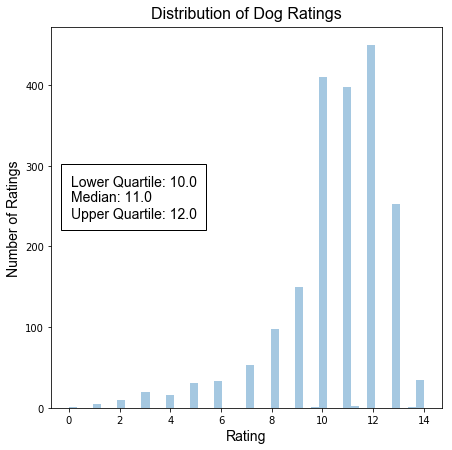

In [350]:
plt.figure(figsize=(7,7))
sns.distplot(master_clean['rating'], kde=False)
plt.title('Distribution of Dog Ratings', fontdict=title_font)
plt.ylabel('Number of Ratings', fontdict=axis_font)
plt.xlabel('Rating', fontdict=axis_font)
plt.annotate(('Lower Quartile: {}\nMedian: {}\nUpper Quartile: {}'.format(
    master_clean['rating'].describe()['25%'],
    master_clean['rating'].describe()['50%'],
    master_clean['rating'].describe()['75%'])),
    xy=(0.05, 0.50), xycoords='axes fraction', fontname='Arial', size='14',
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='square, pad=0.7'));

##### Conclusion
The Dog Ratings system in unique in that it generally hands out scores greater than 10/10.  Scores are heavily left skewed and tend to the median of 11, maxing out at 14.

#### Definition of Popularity
We can proxy a tweet's popularity by how many retweets and likes (favourites) it has, with a higher number in both equating to more popular.  Patterns relating to the popularity of the dog rating tweets can help explain the success of *WeRateDogs*

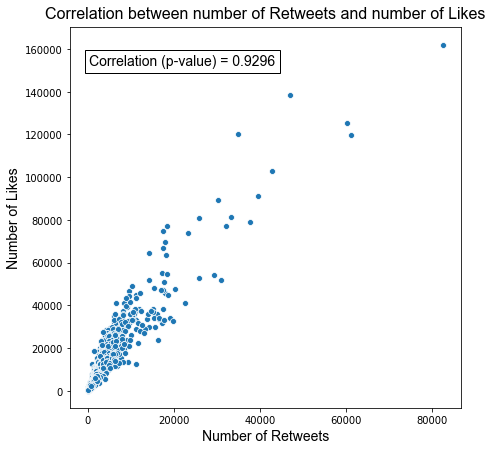

In [351]:
# Plot correlation between Retweets and Likes
plt.figure(figsize=(7,7))
sns.scatterplot(x='retweet_count', y='favourite_count', data=master_clean)
plt.title('Correlation between number of Retweets and number of Likes', fontdict=title_font)
plt.xlabel('Number of Retweets', fontdict=axis_font)
plt.ylabel('Number of Likes',fontdict=axis_font)
plt.annotate('Correlation (p-value) = {}'.format(
    round(master_clean['retweet_count'].corr(master_clean['favourite_count'], method='pearson'), ndigits=4)),
    xy=(0.05, 0.90), xycoords='axes fraction', fontname='Arial', size='14',
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='square, pad=0.3'));

##### Conclusion
Number of retweets and number of likes are highly positively correlated with each other, with a correlation coefficient of 0.9296.  Thus any further analysis involving popularity will just use *Number of Retweets* as proxy.  

Furthermore, this aligns with our investigation of what contributes to the popularity and high following of *WeRateDogs*. While likes and favourites reflect the quality of engagement with followers, Retweets does this plus further distributes a tweet, reaching out to potential followers.

<a id='analyze_3'></a>
#### Timing of Tweet Posts
Does the timing of when a tweet is posted correlate with how popular the tweet becomes?

In [352]:
# Create 'hour' 'day_of_week' 'month' columns in master_clean based on 'timestamp'
master_clean['hour']= master_clean['timestamp'].apply(lambda time: time.hour)
master_clean['day_of_week']= master_clean['timestamp'].apply(lambda time: time.dayofweek)
master_clean['month']= master_clean['timestamp'].apply(lambda time: time.month)
master_clean['year']= master_clean['timestamp'].apply(lambda time: time.year)

In [353]:
master_clean.head()

,tweet_id,timestamp,source,text,rating,expanded_url,dog_stage,retweet_count,favourite_count,name,hour,day_of_week,month,year
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,https://twitter.com/dog_rates/status/892420643...,,8188,37532,Phineas,16,1,8,2017
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,https://twitter.com/dog_rates/status/892177421...,,6057,32260,Tilly,0,1,8,2017
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,https://twitter.com/dog_rates/status/891815181...,,4007,24305,Archie,0,0,7,2017
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,https://twitter.com/dog_rates/status/891689557...,,8331,40873,Darla,15,6,7,2017
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,https://twitter.com/dog_rates/status/891327558...,,9033,39066,Franklin,16,5,7,2017


In [354]:
# map day of week integer to actual string name
dmap = {0:'Mon', 1:'Tue', 2:'Wed',3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
master_clean['day_of_week']= master_clean['day_of_week'].map(dmap)

In [355]:
master_clean.head()

,tweet_id,timestamp,source,text,rating,expanded_url,dog_stage,retweet_count,favourite_count,name,hour,day_of_week,month,year
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,https://twitter.com/dog_rates/status/892420643...,,8188,37532,Phineas,16,Tue,8,2017
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,https://twitter.com/dog_rates/status/892177421...,,6057,32260,Tilly,0,Tue,8,2017
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,https://twitter.com/dog_rates/status/891815181...,,4007,24305,Archie,0,Mon,7,2017
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,https://twitter.com/dog_rates/status/891689557...,,8331,40873,Darla,15,Sun,7,2017
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,https://twitter.com/dog_rates/status/891327558...,,9033,39066,Franklin,16,Sat,7,2017


In [356]:
order_days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [357]:
# Number of tweets broken down by day of the week  per month
day_month_count = master_clean.groupby(by=['day_of_week','month']).count()['tweet_id'].unstack()\
.sort_index(axis=1, ascending=True).reindex(order_days, axis=0)
day_month_count

month,1,2,3,4,5,6,7,8,9,10,11,12
day_of_week,,,,,,,,,,,,
Mon,37,28,20,16,17,19,25,10,7,19,69,57
Tue,29,28,24,10,17,16,20,13,12,9,44,69
Wed,30,27,31,14,14,19,15,11,12,6,48,65
Thu,31,24,23,11,14,24,15,10,11,9,39,67
Fri,39,28,25,19,17,16,21,5,8,7,43,50
Sat,34,19,19,15,10,14,21,6,8,6,49,47
Sun,32,18,22,9,9,14,18,6,5,9,54,57


In [358]:
# Number of retweets broken down by day of the week per month
day_month_retweet = master_clean.groupby(by=['day_of_week','month']).sum()['retweet_count'].unstack()\
.sort_index(axis=1, ascending=True).reindex(order_days, axis=0)
day_month_retweet

month,1,2,3,4,5,6,7,8,9,10,11,12
day_of_week,,,,,,,,,,,,
Mon,65204,52932,47994,50063,111820,85132,80625,37454,17764,65070,68387,119422
Tue,59146,81826,55369,32394,68805,54972,84700,50883,43133,41669,65362,113738
Wed,142573,75552,69703,39059,69144,71678,90223,18437,37186,29374,71799,142416
Thu,40271,56023,49946,39037,64405,94665,42986,19369,56508,49965,44316,88700
Fri,127796,79911,48246,46831,46774,49489,92532,41856,27510,23227,30182,125844
Sat,130953,31569,42385,61777,18625,173323,68118,25817,13360,21002,61079,65004
Sun,69468,50828,69256,32182,46847,65543,60659,21703,19561,27612,40673,130302


#### `Timing 1` How have number of tweets and retweets compared over time?

A comparison of Tweet posting and Retweet activity, to discover whether the number of tweet posted correlate with the number of retweets.

In [359]:
master_clean.groupby(master_clean['timestamp'].dt.to_period('m'))['tweet_id'].count()

C:\Users\Jen\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


timestamp
2015-11    294
2015-12    359
2016-01    166
2016-02    108
2016-03    118
2016-04     54
2016-05     56
2016-06     79
2016-07     86
2016-08     59
2016-09     63
2016-10     65
2016-11     52
2016-12     53
2017-01     66
2017-02     64
2017-03     46
2017-04     40
2017-05     42
2017-06     43
2017-07     49
2017-08      2
Freq: M, Name: tweet_id, dtype: int64

In [360]:
master_clean.groupby(by=(master_clean['timestamp'].dt.to_period('m')))['retweet_count'].sum()

C:\Users\Jen\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


timestamp
2015-11    143994
2015-12    506306
2016-01    237745
2016-02    163983
2016-03    180575
2016-04     81204
2016-05    116037
2016-06    329691
2016-07    201516
2016-08    201274
2016-09    215022
2016-10    257919
2016-11    237804
2016-12    279120
2017-01    397666
2017-02    264658
2017-03    202324
2017-04    220139
2017-05    310383
2017-06    265111
2017-07    318327
2017-08     14245
Freq: M, Name: retweet_count, dtype: int64

C:\Users\Jen\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Jen\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


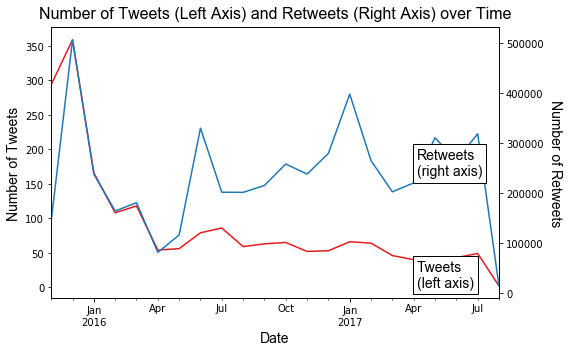

In [361]:
fig,ax = plt.subplots()


#plot number of tweets over time
master_clean.groupby(by=(master_clean['timestamp'].dt.to_period('m')))['tweet_id'].count().plot(colormap='Set1', 
                                                                                             figsize=(8,5))
#set second y-axis
ax2 = ax.twinx()

# plot number of retweets over time
master_clean.groupby(by=(master_clean['timestamp'].dt.to_period('m')))['retweet_count'].sum().plot(colormap='tab10',
                                                                                              figsize=(8,5))
# Set title and axis names
plt.title('Number of Tweets (Left Axis) and Retweets (Right Axis) over Time', fontdict=title_font)
ax.set_ylabel('Number of Tweets', fontdict=axis_font)
ax2.set_ylabel('Number of Retweets',fontdict=axis_font, 
               rotation=270, va='bottom')
ax.set_xlabel('Date',fontdict=axis_font)

# Label graph
fig.text(x=0.73, y=0.19, s='Tweets\n(left axis)', fontdict=axis_font,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square, pad=0.3'))
fig.text(x=0.73, y=0.5, s='Retweets\n(right axis)', fontdict=axis_font,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square, pad=0.3'))

plt.tight_layout();


#### `Timing 2` What is the distribution over a year of when Tweets are posted and when Popular Tweets are posted

Compare the pattern of the distribution over a the year and broken down by day of the week of
- Tweet Postings
- Popular Tweet postings.

Tweet postings identifies any pattern in posting activity over the course of a year broken down by day of the week

Popular Tweet Postings identifes any pattern of when popular tweets are posted, by aggreagating the number of retweets, broken down by month and day of the week. 

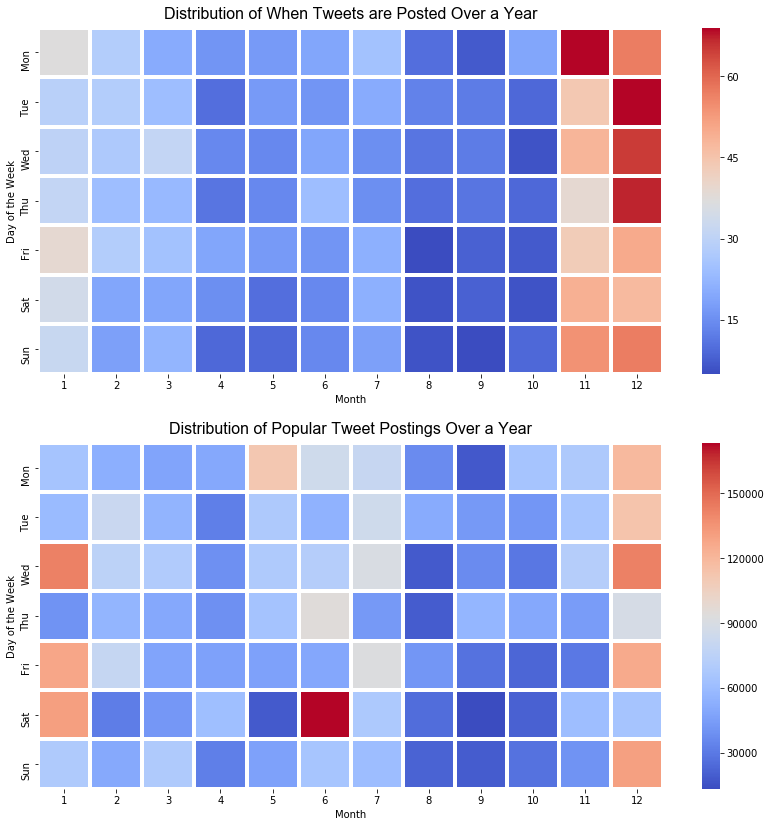

In [362]:
# Heatmap distribution of how popular tweets are based on when they are posted, 
# taking into account pattern on tweet posting
figure,axes = plt.subplots(nrows=2, ncols=1, figsize=(14,14))

sns.heatmap(day_month_count, cmap='coolwarm',linecolor='white', linewidth=3, ax=axes[0])
axes[0].set_title('Distribution of When Tweets are Posted Over a Year', fontdict=title_font)
axes[0].set_ylabel('Day of the Week')
axes[0].set_xlabel('Month')

sns.heatmap(day_month_retweet, cmap='coolwarm', linecolor='white', linewidth=3, ax=axes[1])
axes[1].set_title('Distribution of Popular Tweet Postings Over a Year', fontdict=title_font)
axes[1].set_ylabel('Day of the Week')
axes[1].set_xlabel('Month')

plt.tight_layout;


##### Conclusion
Although the number of Tweets have dropped over time, the Retweet activity has remained elevated after a dip, and now trending over 2000 retweets per month.  The drop at the end is due to the dataset ending with an incomplete month of data. 

Interestingly, retweets were quite elevated towards the inception of the account, even though one would assume less followers.  This suggests that either a few Tweets were very popular early on or followers that jumped on board later on re-deiscovered and retweeted these early Tweets.  I think combined with the increased Tweeting activty early on both of these factors were at play and that these early Tweets were the impetus to the increasing popularity of *WeRateDogs*  

More tweets are posted in the months of November and December.  However this does not coincide with when the most popular tweets are posted.  While tweets tended to be more popular if they were posted in December, the most popular tweet and/or tweets are posted on a Saturday in June.  

Since the heatmap is an aggregation of retweets for each month and day of week, the hotspot in June could be due to posting of extremely popular posts that were retweeted extensively, or due to increased Tweet posting activity with a larger number of Tweets retweeted at a moderate level.  However, in conjunction with the heatmap showing the distribution of Tweet posting activity, the former reason is more feasible, that a few extremely popular post were retweeted extensively.



<a id='analyze_4'></a>
#### Analysing the most popular tweets

Ordering the data based on popularity (*retweet_count*), common themes can be found as to what makes a tweet popular and thus contributing to the popularity and following of *WeRateDogs* 

In [363]:
# Top 20 Most common dog names
master_clean['name'].value_counts().head(20)

Oliver     11
Cooper     11
Charlie    10
Lucy       10
Penny       9
Tucker      9
Sadie       8
Winston     8
Toby        7
Daisy       7
Lola        7
Stanley     6
Bo          6
Jax         6
Bella       6
Koda        6
Milo        5
Atlas       5
Jack        5
Louis       5
Name: name, dtype: int64

In [364]:
# Create a dataframe merging element of master and image_predictions 
master_image_pred_1=pd.merge(master_clean[['tweet_id','timestamp','month','day_of_week',
                                           'rating','retweet_count','name', 'dog_stage']],
        df_images_predictions[df_images_predictions['prediction_number']==1][['tweet_id', 
                                                                              'prediction','confidence','is_dog']],
        on='tweet_id', how='inner')

In [365]:
master_image_pred_1['retweet_count'].describe()

count     1964.000000
mean      2619.675662
std       4680.287582
min         11.000000
25%        583.750000
50%       1256.000000
75%       2995.500000
max      82432.000000
Name: retweet_count, dtype: float64

In [366]:
master_image_pred_1['timestamp'].min(), master_image_pred_1['timestamp'].max()

(Timestamp('2015-11-15 22:32:08+0000', tz='UTC'),
 Timestamp('2017-08-01 16:23:56+0000', tz='UTC'))

In [367]:
master_image_pred_1.sort_values(by='retweet_count', ascending=False).head(20)

,tweet_id,timestamp,month,day_of_week,rating,retweet_count,name,dog_stage,prediction,confidence,is_dog
763,744234799360020481,2016-06-18 18:26:18+00:00,6,Sat,13.0,82432,NaN,doggo,Labrador_Retriever,0.825333,True
798,739238157791694849,2016-06-04 23:31:25+00:00,6,Sat,13.0,61044,NaN,doggo,American_Eskimo_Dog,0.503372,True
394,807106840509214720,2016-12-09 06:17:20+00:00,12,Fri,13.0,60130,Stephan,,Chihuahua,0.505370,True
304,822872901745569793,2017-01-21 18:26:02+00:00,1,Sat,13.0,46998,NaN,puppo,Lakeland_Terrier,0.196015,True
58,879415818425184262,2017-06-26 19:07:24+00:00,6,Mon,13.0,42801,Duddles,,English_Springer_Spaniel,0.383404,True
328,819004803107983360,2017-01-11 02:15:36+00:00,1,Wed,14.0,39558,Bo,doggo,standard_poodle,0.351308,True
396,806629075125202948,2016-12-07 22:38:52+00:00,12,Wed,13.0,37612,NaN,,Arabian_camel,0.366248,False
107,866450705531457537,2017-05-22 00:28:40+00:00,5,Mon,13.0,34950,Jamesy,pupper,French_Bulldog,0.905334,True
1402,678399652199309312,2015-12-20 02:20:55+00:00,12,Sun,12.0,33248,NaN,,swing,0.929196,False
1459,676219687039057920,2015-12-14 01:58:31+00:00,12,Mon,10.0,32192,Kenneth,,bubble,0.997556,False


In [368]:
master_clean[['tweet_id','timestamp','text','retweet_count', 'expanded_url']]\
                    .sort_values(by='retweet_count',ascending=False).head(10).values

array([['744234799360020481',
        Timestamp('2016-06-18 18:26:18+0000', tz='UTC'),
        "Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad)",
        82432,
        'https://twitter.com/dog_rates/status/744234799360020481/video/1'],
       ['739238157791694849',
        Timestamp('2016-06-04 23:31:25+0000', tz='UTC'),
        "Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee)",
        61044,
        'https://twitter.com/dog_rates/status/739238157791694849/video/1'],
       ['807106840509214720',
        Timestamp('2016-12-09 06:17:20+0000', tz='UTC'),
        'This is Stephan. He just wants to help. 13/10 such a good boy',
        60130,
        'https://twitter.com/dog_rates/status/807106840509214720/video/1'],
       ['822872901745569793',
        Timestamp('2017-01-21 18:26:02+0000', tz='UTC'),
        "Here's a super supportive puppo participating in the Toronto  #Women

In [369]:
master_clean[master_clean['name']=='George']

,tweet_id,timestamp,source,text,rating,expanded_url,dog_stage,retweet_count,favourite_count,name,hour,day_of_week,month,year
198,842163532590374912,2017-03-16 00:00:07+00:00,Twitter for iPhone,Meet George. He looks slightly deflated but ov...,12.0,https://twitter.com/dog_rates/status/842163532...,,6088,25211,George,0,Thu,3,2017
722,749395845976588288,2016-07-03 00:14:27+00:00,Twitter for iPhone,This is George. He just remembered that bees a...,10.0,https://twitter.com/dog_rates/status/749395845...,,3669,8943,George,0,Sun,7,2016
1569,673686845050527744,2015-12-07 02:13:55+00:00,Twitter for iPhone,This is George. He's upset that the 4th of Jul...,11.0,https://twitter.com/dog_rates/status/673686845...,,448,1438,George,2,Mon,12,2015
1872,667546741521195010,2015-11-20 03:35:20+00:00,Twitter Web Client,Here is George. George took a selfie of his ne...,9.0,https://twitter.com/dog_rates/status/667546741...,,125,331,George,3,Fri,11,2015


In [370]:
master_image_pred_1.sort_values(by='retweet_count', ascending=True).head(10)

,tweet_id,timestamp,month,day_of_week,rating,retweet_count,name,dog_stage,prediction,confidence,is_dog
1945,666102155909144576,2015-11-16 03:55:04+00:00,11,Mon,11.0,11,NaN,,English_Setter,0.298617,True
1925,666447344410484738,2015-11-17 02:46:43+00:00,11,Tue,9.0,19,Scout,,Curly_Coated_Retriever,0.322084,True
1833,668291999406125056,2015-11-22 04:56:43+00:00,11,Sun,10.0,31,NaN,,web_site,0.995535,False
1943,666268910803644416,2015-11-16 14:57:41+00:00,11,Mon,10.0,34,NaN,,desktop_computer,0.086502,False
1933,666407126856765440,2015-11-17 00:06:54+00:00,11,Tue,7.0,37,NaN,,Black_and_Tan_Coonhound,0.529139,True
1957,666049248165822465,2015-11-16 00:24:50+00:00,11,Mon,5.0,41,NaN,,Miniature_Pinscher,0.560311,True
1959,666033412701032449,2015-11-15 23:21:54+00:00,11,Sun,9.0,43,NaN,,German_Shepherd_Dog,0.596461,True
1716,670676092097810432,2015-11-28 18:50:15+00:00,11,Sat,8.0,43,Bloo,,Dandie_Dinmont_Terrier,0.676102,True
1820,668620235289837568,2015-11-23 02:41:01+00:00,11,Mon,10.0,43,Kallie,,crash_helmet,0.757942,False
1948,666082916733198337,2015-11-16 02:38:37+00:00,11,Mon,6.0,44,NaN,,Pug,0.489814,True


##### How are dog stages represented?

In [371]:
#Pie chart
labels_dog_stage= list(master_clean['dog_stage'].value_counts().index)[1:]
sizes_dog_stage = list(master_clean['dog_stage'].value_counts().values)[1:]
labels_has_stage= ('No Dog Stage','')
sizes_has_stage=list(master_clean['dog_stage'].value_counts().values)[0],sum(sizes_dog_stage)
#colours
colours_dog_stage=['#4a63d4','#b40426','#92b4fe','#d6dce4', '#ef896c']
colours_has_stage = ['#DCDCDC','#f7b295']

# Explode slice 'doggo' and 'Has Dog Stage'
explode_dog_stage = (0,0.2,0,0,0)
explode_has_stage=(0,0.2)

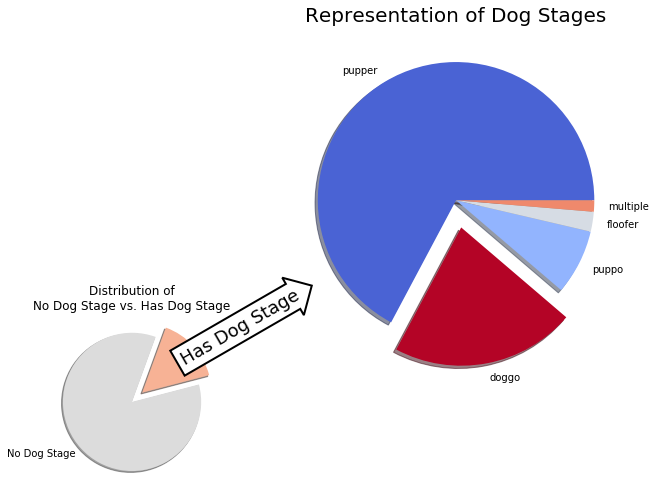

In [372]:
fig = plt.figure(figsize=(10,8))


axes1 = fig.add_axes([0.1, 0.1, 0.3, 0.3]) 
axes2 = fig.add_axes([0.4, 0.3, 0.6,0.6])

axes1.pie(x=sizes_has_stage, explode=explode_has_stage,
          colors=colours_has_stage, labels=labels_has_stage, 
          startangle=70,shadow=True)
axes1.set_title('Distribution of\nNo Dog Stage vs. Has Dog Stage')

axes2.pie(x=sizes_dog_stage, explode=explode_dog_stage,
          colors=colours_dog_stage, labels=labels_dog_stage, 
          shadow=True)
axes2.set_title('Representation of Dog Stages' , fontsize=20)




bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="white", ec="black", lw=2)
t = fig.text(0.4, 0.38, "Has Dog Stage", ha="center", va="center", rotation=30,
            size=18,
            bbox=bbox_props)


##### Conclusions

- 3 out of 5 of the most popular tweets, based on retweets, were posted in June, with the top 2 both posted on a Saturday in June, 3 weeks apart.  In contrast the least popular 10 tweets were all posted in November 2015.  The least popular tweets occurred at the beginning of the dataset, when the *WeRateDogs* Twitter account was just beginning so understandably would not have many followers to retweet.  

- Of note, in the top 10 popular tweets are tweets from early on in the dataset, on 14th and 20th December 2015.  According to image prediction , these are considered 'humourous' as their image predictions resulted in bubble and swing.  Perhaps with the popularity of these tweets began the rapid rise in popularity and followers of *WeRateDogs*.  It is interesting that around the time of these early popular tweets in December 2015, *WeRateDogs* significantly decreased the number of dog rating Tweets, which started at around 300 per month, peaking at about 350 in December 2015 and dropping to around 50 per month from April 2016, a level maintained since.  

- Top 12 most popular tweets account for the top quartile for number of retweets, with a range occuring in the years 2015-2017, thus length of time since posting may not neccessarily be such a strong factor contributing to the large number of retweets.

- Half the dogs in the most popular 10 tweets have a name, with neither of the top 2 Tweets having mention of the dog name.  Futhermore, only 1 of the 9 names in the 20 top popular posts are found in the top 20 most common dog names.  That name is Buddy, which is common dog name number 20. 

- 3 of the dogs in the top 10 are classified at the *doggo* dog stage.  In fact the number 1 and 2 popular Tweets are about *doggos*.  This is interesting, considering that doggos represent a small percentage of the total tweets, and if we exclude tweets without a dog stage mentioned, *doggos* still only represent about a quarter.

- The top 20 most popular Tweets have ratings above 10, with 16 of the Tweets having ratings in the upper quartile.  In contrast the 10 least popular Tweets have ratings 11 and below, with 6 having a rating in the lower quartile.  Again these least popular tweets were in the infancy of the account and most likely before the workings of the generous rating system were ironed out

- The top 3 most popular Tweets included a video and according to the text, the dog is doing something that is not usual for a dog
    - Here's a doggo realizing you can stand in a pool.
    - Here's a doggo blowing bubbles.
    - This is Stephan. He just wants to help.

<a id='analyze_5'></a>
#### Is there a relationship between humourous tweets and dog rating or popularity?

*WeRateDogs* is known for its humourous Tweets.  Perhaps humourous tweets are more popular and readily shared, thus increasing engagement and followers.

`Humour 1`If we first define a humourous tweet as one where the dog may not be so easily visible in the photo due to perhaps blending in to the background or in costume, we could use the image prediction data.  A prediction that is not a dog could be a proxy for humour.  We will use the data from the most confident prediction

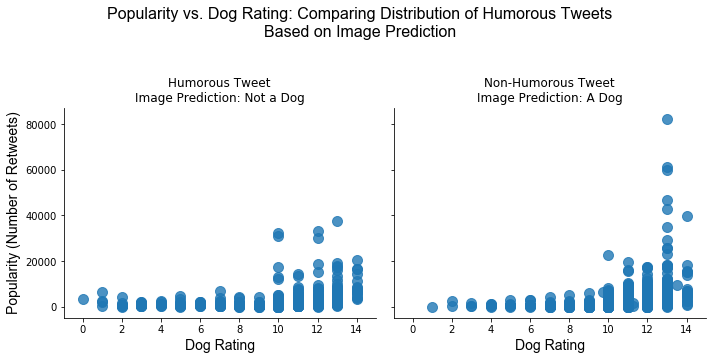

In [373]:
# Plot the relationship between ratings and retweet_count, 
#separating for whether the most confident image prediction was a dog or not

#plt.figure(figsize=(12,12))

g=sns.lmplot(x='rating',y='retweet_count',data=master_image_pred_1,col='is_dog', fit_reg=False,
           scatter_kws={'s':100},palette='coolwarm', height=5, aspect=1, legend=False)
plt.subplots_adjust(top=0.7)
g.fig.suptitle('Popularity vs. Dog Rating: Comparing Distribution of Humorous Tweets\nBased on Image Prediction', 
               fontdict=title_font, fontsize='16')
g.set_xlabels('Dog Rating', fontdict=axis_font)
g.set_ylabels('Popularity (Number of Retweets)', fontdict=axis_font)

g.fig.axes[0].set_title('Humorous Tweet\nImage Prediction: Not a Dog')
g.fig.axes[1].set_title('Non-Humorous Tweet\nImage Prediction: A Dog')

plt.tight_layout;

`Humour 2`  Alternatively, we could search the tweet text for common 'joke' phrases, suggesting there is no dog in the picture.  

Common joke phrases are: 
- We only rate dogs
- Please only send photos of dogs
- Another photo without a dog

In [374]:
# Select rows in master_clean that contain joke phrases in 'text' and set 'humourous_comment' to True
master_clean.loc[master_clean['text'].str.lower().str.contains('we only rate dogs') | \
                 master_clean['text'].str.lower().str.contains('please only send') | \
                 master_clean['text'].str.lower().str.contains('without a dog'),'humourous_comment']=True


In [375]:
# 'humourous_comment' set to False if text does not contain joke phrase
master_clean.loc[master_clean['humourous_comment'].isnull(),'humourous_comment']=False

In [376]:
master_clean.head()

,tweet_id,timestamp,source,text,rating,expanded_url,dog_stage,retweet_count,favourite_count,name,hour,day_of_week,month,year,humourous_comment
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,https://twitter.com/dog_rates/status/892420643...,,8188,37532,Phineas,16,Tue,8,2017,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,https://twitter.com/dog_rates/status/892177421...,,6057,32260,Tilly,0,Tue,8,2017,False
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,https://twitter.com/dog_rates/status/891815181...,,4007,24305,Archie,0,Mon,7,2017,False
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,https://twitter.com/dog_rates/status/891689557...,,8331,40873,Darla,15,Sun,7,2017,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,https://twitter.com/dog_rates/status/891327558...,,9033,39066,Franklin,16,Sat,7,2017,False


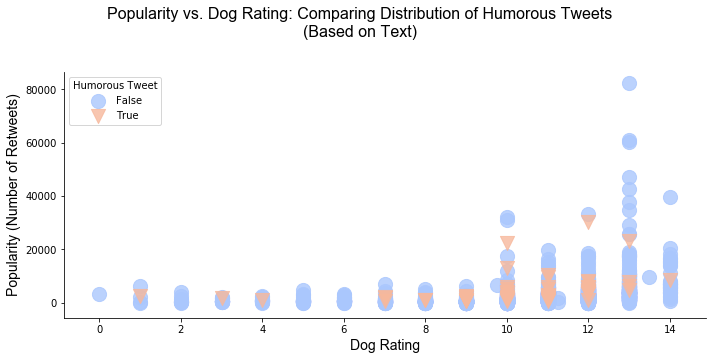

In [377]:
# Plot the relationship between ratings and retweet_count, 
#separating for whether the text contained a joke phrase
g=sns.lmplot(x='rating',y='retweet_count',data=master_clean,hue='humourous_comment', fit_reg=False,
           markers=['o','v'],scatter_kws={'s':200},
             palette='coolwarm', height=5, aspect=2, legend=False, legend_out=True)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Popularity vs. Dog Rating: Comparing Distribution of Humorous Tweets\n(Based on Text)', 
               fontdict=title_font, fontsize='16')
g.set_xlabels('Dog Rating', fontdict=axis_font)
g.set_ylabels('Popularity (Number of Retweets)', fontdict=axis_font)

plt.legend(title='Humorous Tweet', loc='upper left')
plt.tight_layout;

##### Conclusion
Comparing Popularity of a Tweet with the Dog Rating given, there does appear that higher dog rating Tweets are more popular.  However we must take into consideration that over 75% of the Tweets have a dog rating greater than 10, thus increasing the possibility that tweets with higher ratings become more popular.

When using either Image Prediction or Text as proxy for humour, the humourous Tweets are not the the most popular and otherwise trend similarly to non-humourous Tweets. 

This is however an imperfect system to define humourous Tweets.   

<a id='conclusion'></a>
## Conclusions
- Dog Ratings, while generous and routinely above 10/10, still trend around the median of 11 and max out at 14 
- Tweeting activity giving out Dog Ratings has decreased significantly since inception of the *WeRate ogs* account, while Retweets have remained elevated.  The early Tweets were retweeted extensively and possibly were the impetus for the huge following of the *WeRateDogs* account to the point where retweet activity is sustained even though Tweeting dog ratings has decresed.
- Tweeting activity is generally higher in November and December with tweets posted in December and January more popular.  However tweets posted on Saturday in June were retweeted the most.  This can be attributed to the two most popular Tweets.
- The top 12 Tweets, out of nearly 2000, account for the top quartile of popularity (number of retweets).  These tweets span across the years 2015-2017
- 5 of the dogs in the 10 most Popular Tweets had their name mentioned.  Only one of the 9 names mentioned in the 20 most popular Tweeets were in the top 20 common names in the dataset
- *doggo* dog stage was disproportionately represented in the top 10 Tweets, 3 out 10, with 2 of them the 2 most popular tweets.
- Humourous Tweets aren't generally more popular than non-humours tweets.  This could be due to an imperfect system in defining humourous tweets among a set of Tweets that are known to be humourous.
- The top 3 popular Tweets included a video showing activities not normally done by a dog - standing in a pool, blowing bubbles, just trying to help.


### Extensions

##### Data Wrangling
Data wrangling of the *WeRateDog* Twitter data uncovered both *Quality* and *Tidiness* issues.  A bulk of the assessment and cleaning involved reading the Twitter text.  Thus being able somehow to assess programatically as opposed to visually may be more time efficient and less prone to human error.

##### Analysis
Other interesting avenues of analysis could include:
* How have the Dog Ratings trended over time?
* How has the number of followers trended over time?
    - Were there spikes in number of followers that coincide a Tweet?
* Are there certain key words in the text of the most popular Dog Rating Tweets?
* The timing of retweets from retweet date as opposed to date of original post
* Are Tweets with a video included more popular?   





### Resources### 

[6 signs of 
dirty data](https://www.umbel.com/blog/audience-data/6-signs-dirty-data-infographic/)

[check encoding of file](https://stackoverflow.com/questions/37177069/how-to-check-encoding-of-a-csv-file)

https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

https://knowledge.udacity.com/questions/9781

[json.dump each variable on new line](https://stackoverflow.com/questions/17055117/python-json-dump-append-to-txt-with-each-variable-on-new-line)

https://stackoverflow.com/questions/21308762/avoid-twitter-api-limitation-with-tweepy

https://stackoverflow.com/questions/18869688/twitter-api-check-if-a-tweet-is-a-retweet

https://knowledge.udacity.com/questions/33009

https://stackoverflow.com/questions/49161120/pandas-python-set-value-of-one-column-based-on-value-in-another-column

[sort weekday on heatmap](https://stackoverflow.com/questions/47741400/pandas-dataframe-group-and-sort-by-weekday?rq=1)

[create dataframes in a loop](https://stackoverflow.com/questions/55277587/create-dataframe-in-a-loop)

[Dog breed list](https://en.wikipedia.org/wiki/American_Kennel_Club#Recognized_breeds)

[Implot Title](https://mlwhiz.com/blog/2015/09/13/seaborn_visualizations/)